In [1]:
#Building Modules

In [60]:
import pandas as pd 

In [61]:
import hello as h

In [63]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
%autoreload 2

In [65]:
h.message

'Hello Carl and Jimes'

In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import edhec_risk_kit as erk

returns = erk.get_ffme_returns()
returns.head()

SmallCap  LargeCap
1926-07   -0.0145    0.0329
1926-08    0.0512    0.0370
1926-09    0.0093    0.0067
1926-10   -0.0484   -0.0243
1926-11   -0.0078    0.0270

In [68]:
erk.drawdown(returns["SmallCap"])["Drawdown"]

1926-07    0.000000
1926-08    0.000000
1926-09    0.000000
1926-10   -0.048400
1926-11   -0.055822
             ...   
2018-08    0.000000
2018-09   -0.016800
2018-10   -0.115317
2018-11   -0.147608
2018-12   -0.278109
Freq: M, Name: Drawdown, Length: 1110, dtype: float64

In [69]:
erk.drawdown(returns["SmallCap"])["Drawdown"].min()

-0.8330007793945303

In [70]:
erk.drawdown(returns["1975":]["SmallCap"])["Drawdown"].min()

-0.6312068077252386

# Deviations from Normality


In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import edhec_risk_kit as erk


In [2]:
hfi = erk.get_hfi_returns()
hfi.head()

C:\Users\33758\edhec_risk_kit.py:34: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hfi = pd.read_csv("data/edhec-hedgefundindices.csv",


Convertible Arbitrage  CTA Global  Distressed Securities  \
date                                                                
1997-01                 0.0119      0.0393                 0.0178   
1997-02                 0.0123      0.0298                 0.0122   
1997-03                 0.0078     -0.0021                -0.0012   
1997-04                 0.0086     -0.0170                 0.0030   
1997-05                 0.0156     -0.0015                 0.0233   

         Emerging Markets  Equity Market Neutral  Event Driven  \
date                                                             
1997-01            0.0791                 0.0189        0.0213   
1997-02            0.0525                 0.0101        0.0084   
1997-03           -0.0120                 0.0016       -0.0023   
1997-04            0.0119                 0.0119       -0.0005   
1997-05            0.0315                 0.0189        0.0346   

         Fixed Income Arbitrage  Global Macro  Long/Short Equity  \
date                                                               
1997-01                  0.0191        0.0573             0.0281   
1997-02                  0.0122        0.0175            -0.0006   
1997-03                  0.0109       -0.0119            -0.0084   
1997-04                  0.0130        0.0172             0.0084   
1997-05                  0.0118        0.0108             0.0394   

         Merger Arbitrage  Relative Value  Short Selling  Funds Of Funds  
date                                                                      
1997-01            0.0150          0.0180        -0.0166          0.0317  
1997-02            0.0034          0.0118         0.0426          0.0106  
1997-03            0.0060          0.0010         0.0778         -0.0077  
1997-04           -0.0001          0.0122        -0.0129          0.0009  
1997-05            0.0197          0.0173        -0.0737          0.0275

In [ ]:
pd.concat([hfi.mean(), hfi.mean(), hfi.mean()>hfi.median()], axis="columns")

0         1      2
Convertible Arbitrage   0.005508  0.005508  False
CTA Global              0.004074  0.004074   True
Distressed Securities   0.006946  0.006946  False
Emerging Markets        0.006253  0.006253  False
Equity Market Neutral   0.004498  0.004498  False
Event Driven            0.006344  0.006344  False
Fixed Income Arbitrage  0.004365  0.004365  False
Global Macro            0.005403  0.005403   True
Long/Short Equity       0.006331  0.006331  False
Merger Arbitrage        0.005356  0.005356  False
Relative Value          0.005792  0.005792  False
Short Selling          -0.001701 -0.001701   True
Funds Of Funds          0.004262  0.004262  False

In [ ]:
 erk.skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.940320
Convertible Arbitrage    -2.639592
Equity Market Neutral    -2.124435
Relative Value           -1.815470
Event Driven             -1.409154
Merger Arbitrage         -1.320083
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Long/Short Equity        -0.390227
Funds Of Funds           -0.361783
CTA Global                0.173699
Short Selling             0.767975
Global Macro              0.982922
dtype: float64

In [ ]:
import scipy.stats 
scipy.stats.skew(hfi)

array([-2.63959223,  0.17369864, -1.30084204, -1.16706749, -2.12443538,
       -1.40915356, -3.94032029,  0.98292188, -0.39022677, -1.32008333,
       -1.81546975,  0.76797484, -0.36178308])

In [ ]:
 erk.skewness(hfi)

Convertible Arbitrage    -2.639592
CTA Global                0.173699
Distressed Securities    -1.300842
Emerging Markets         -1.167067
Equity Market Neutral    -2.124435
Event Driven             -1.409154
Fixed Income Arbitrage   -3.940320
Global Macro              0.982922
Long/Short Equity        -0.390227
Merger Arbitrage         -1.320083
Relative Value           -1.815470
Short Selling             0.767975
Funds Of Funds           -0.361783
dtype: float64

In [ ]:
hfi.shape


(263, 13)

In [ ]:
import numpy as np
normal_rets = np.random.normal(0,.15, size= (263, 1))
erk.skewness(normal_rets)

-0.13122534789952828

In [ ]:
import numpy as np
normal_rets = np.random.normal(0,.15, size= (26300, 1))
erk.skewness(normal_rets)

0.012270998980932245

Kurtosis

In [ ]:
erk.kurtosis(normal_rets)

3.0131737500882987

In [ ]:
erk.kurtosis(hfi)

Convertible Arbitrage     23.280834
CTA Global                 2.952960
Distressed Securities      7.889983
Emerging Markets           9.250788
Equity Market Neutral     17.218555
Event Driven               8.035828
Fixed Income Arbitrage    29.842199
Global Macro               5.741679
Long/Short Equity          4.523893
Merger Arbitrage           8.738950
Relative Value            12.121208
Short Selling              6.117772
Funds Of Funds             7.070153
dtype: float64

In [ ]:
scipy.stats.kurtosis(normal_rets)

array([0.01317375])

In [ ]:
scipy.stats.jarque_bera(normal_rets)

SignificanceResult(statistic=0.8502103519033999, pvalue=0.6537010278863712)

In [ ]:
scipy.stats.jarque_bera(hfi)

SignificanceResult(statistic=25656.585999171337, pvalue=0.0)

In [ ]:
erk.is_normal(normal_rets)

True

In [ ]:
erk.is_normal(hfi)

False

In [ ]:
hfi.aggregate(erk.is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

In [ ]:
ffme = erk.get_ffme_returns()
erk.skewness(ffme)

SmallCap    4.410739
LargeCap    0.233445
dtype: float64

In [ ]:
erk.kurtosis(ffme)

SmallCap    46.845008
LargeCap    10.694654
dtype: float64

In [ ]:
erk.is_normal(ffme)

False

In [ ]:
ffme.aggregate(erk.is_normal)

SmallCap    False
LargeCap    False
dtype: bool

#Efficient Frontier

In [29]:
import pandas as pd 
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header = 0, index_col=0, parse_dates=True)/100


In [30]:
ind.head()

Food    Beer    Smoke   Games   Books   Hshld   Clths   Hlth   \
192607  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
192608  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
192609  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
192610 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
192611  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   

         Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans   Whlsl  \
192607  0.0814  0.0039  ...  0.0083  0.0922  0.0206  0.0770  0.0193 -0.2379   
192608  0.0550  0.0814  ...  0.0217  0.0202  0.0439 -0.0238  0.0488  0.0539   
192609  0.0533  0.0231  ...  0.0241  0.0225  0.0019 -0.0554  0.0005 -0.0787   
192610 -0.0476  0.0100  ... -0.0011 -0.0200 -0.0109 -0.0508 -0.0264 -0.1538   
192611  0.0520  0.0311  ...  0.0163  0.0377  0.0364  0.0384  0.0160  0.0467   

         Rtail   Meals   Fin     Other  
192607  0.0007  0.0187  0.0037  0.0520  
192608 -0.0075 -0.0013  0.0446  0.0676  
192609  0.0025 -0.0056 -0.0123 -0.0386  
192610 -0.0220 -0.0411 -0.0516 -0.0849  
192611  0.0652  0.0433  0.0224  0.0400  

[5 rows x 30 columns]

In [31]:
 ind.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [32]:
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
ind.head()

Food    Beer    Smoke   Games   Books   Hshld   Clths   Hlth   \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   

          Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans   Whlsl  \
1926-07  0.0814  0.0039  ...  0.0083  0.0922  0.0206  0.0770  0.0193 -0.2379   
1926-08  0.0550  0.0814  ...  0.0217  0.0202  0.0439 -0.0238  0.0488  0.0539   
1926-09  0.0533  0.0231  ...  0.0241  0.0225  0.0019 -0.0554  0.0005 -0.0787   
1926-10 -0.0476  0.0100  ... -0.0011 -0.0200 -0.0109 -0.0508 -0.0264 -0.1538   
1926-11  0.0520  0.0311  ...  0.0163  0.0377  0.0364  0.0384  0.0160  0.0467   

          Rtail   Meals   Fin     Other  
1926-07  0.0007  0.0187  0.0037  0.0520  
1926-08 -0.0075 -0.0013  0.0446  0.0676  
1926-09  0.0025 -0.0056 -0.0123 -0.0386  
1926-10 -0.0220 -0.0411 -0.0516 -0.0849  
1926-11  0.0652  0.0433  0.0224  0.0400  

[5 rows x 30 columns]

In [33]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [34]:
ind.columns = ind.columns.str.strip()
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [35]:
ind.shape

(1110, 30)

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
import edhec_risk_kit as erk

In [13]:
ind = erk.get_ind_returns ()
ind.shape

(1110, 30)

In [14]:
ind.head()

Food    Beer   Smoke   Games   Books   Hshld   Clths    Hlth  \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   

          Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans   Whlsl  \
1926-07  0.0814  0.0039  ...  0.0083  0.0922  0.0206  0.0770  0.0193 -0.2379   
1926-08  0.0550  0.0814  ...  0.0217  0.0202  0.0439 -0.0238  0.0488  0.0539   
1926-09  0.0533  0.0231  ...  0.0241  0.0225  0.0019 -0.0554  0.0005 -0.0787   
1926-10 -0.0476  0.0100  ... -0.0011 -0.0200 -0.0109 -0.0508 -0.0264 -0.1538   
1926-11  0.0520  0.0311  ...  0.0163  0.0377  0.0364  0.0384  0.0160  0.0467   

          Rtail   Meals     Fin   Other  
1926-07  0.0007  0.0187  0.0037  0.0520  
1926-08 -0.0075 -0.0013  0.0446  0.0676  
1926-09  0.0025 -0.0056 -0.0123 -0.0386  
1926-10 -0.0220 -0.0411 -0.0516 -0.0849  
1926-11  0.0652  0.0433  0.0224  0.0400  

[5 rows x 30 columns]

<Axes: >

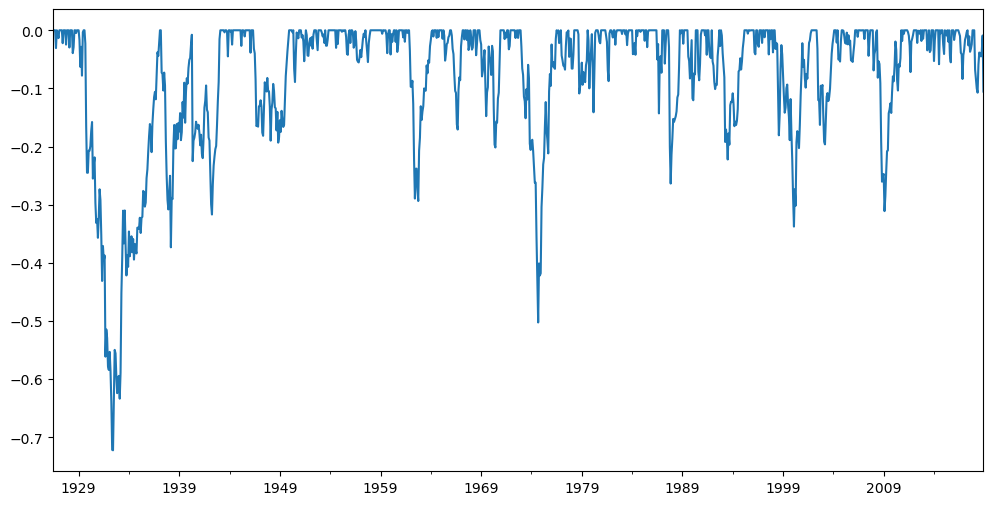

In [15]:
erk.drawdown(ind["Food"])["Drawdown"].plot.line(figsize=(12,6))

In [16]:
erk.var_gaussian(ind[["Food", "Smoke", "Coal", "Beer", "Fin"]], modified=True)

Food     0.061207
Smoke    0.080292
Coal     0.047359
Beer     0.033881
Fin      0.075199
dtype: float64

In [17]:
    erk.var_gaussian(ind, modified=True).sort_values().tail()

Carry    0.094527
Meals    0.098403
BusEq    0.099377
Games    0.100701
Mines    0.102782
dtype: float64

In [18]:
erk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

In [19]:
erk.var_gaussian(ind, modified=True).sort_values().head()

Beer     0.033881
Coal     0.047359
Food     0.061207
Telcm    0.064719
Hshld    0.064886
dtype: float64

<Axes: >

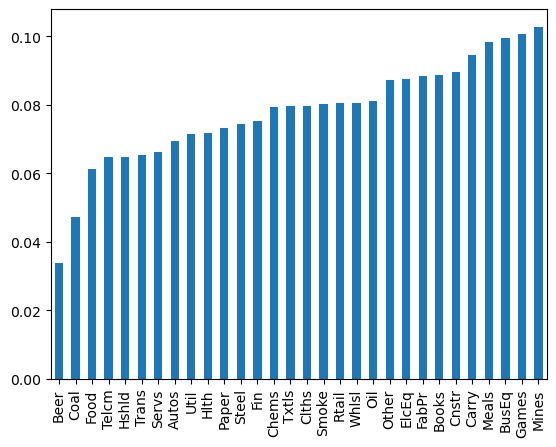

In [20]:
erk.var_gaussian(ind, modified=True).sort_values().plot.bar()

In [21]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

<Axes: title={'center': 'Industry Sharpe Ratios 1926 - 2018'}>

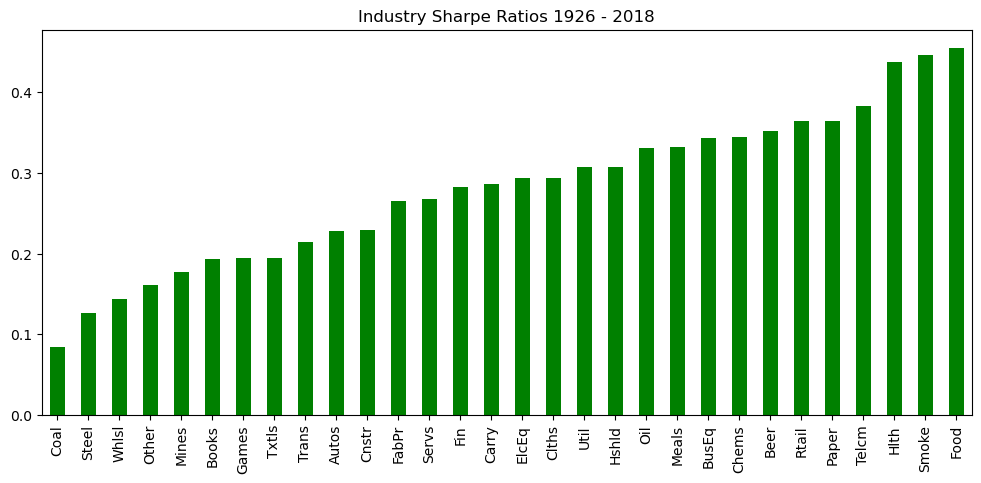

In [22]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 1926 - 2018", figsize=(12,5), color="green")


<Axes: title={'center': 'Industry Sharpe Ratios 2000 - 2018'}>

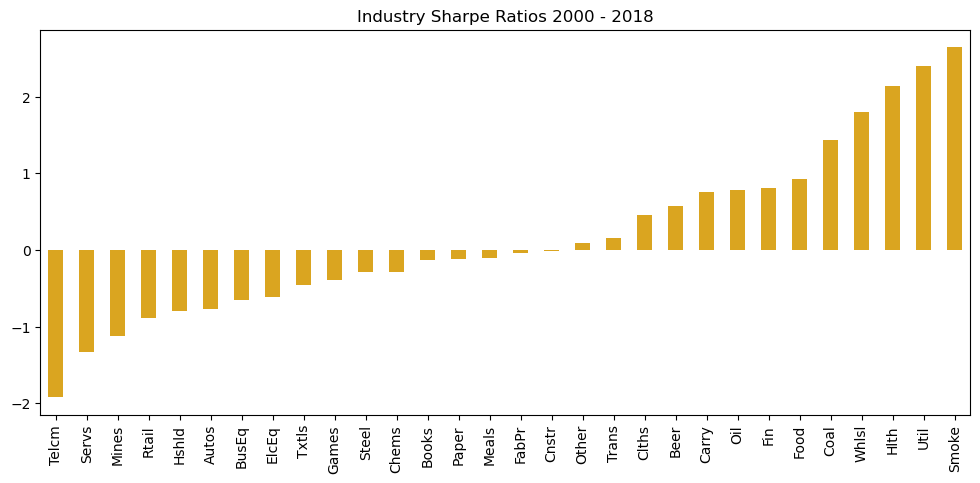

In [17]:
erk.sharpe_ratio(ind.loc["2000"], 0.03, 12).sort_values().plot.bar(title="Industry Sharpe Ratios 2000 - 2018", figsize=(12,5), color="goldenrod")

<Axes: >

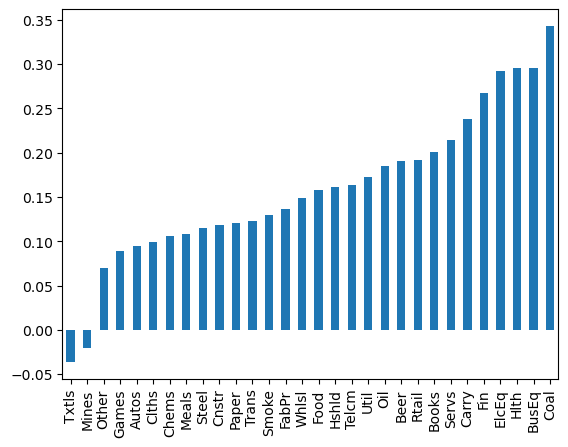

In [24]:
er = erk.annualize_rets(ind["1995":"2000"], 12)
er.sort_values().plot.bar()

<Axes: >

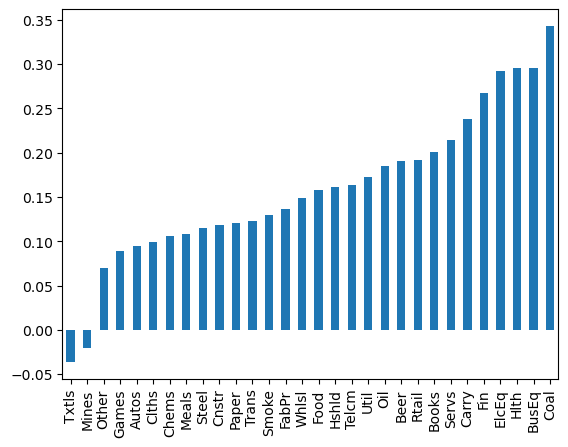

In [27]:
er.sort_values().plot.bar()

In [28]:
cov = ind["1995":"2000"].cov()
cov.shape

(30, 30)

In [29]:
cov

Food      Beer     Smoke     Games     Books     Hshld     Clths  \
Food   0.002287  0.002077  0.001757  0.000701  0.000886  0.001208  0.001474   
Beer   0.002077  0.004599  0.001143  0.001147  0.000765  0.002447  0.001415   
Smoke  0.001757  0.001143  0.007130  0.000296 -0.000099  0.000981  0.000761   
Games  0.000701  0.001147  0.000296  0.003271  0.001485  0.001018  0.001814   
Books  0.000886  0.000765 -0.000099  0.001485  0.002302  0.000876  0.002037   
Hshld  0.001208  0.002447  0.000981  0.001018  0.000876  0.002849  0.001046   
Clths  0.001474  0.001415  0.000761  0.001814  0.002037  0.001046  0.004896   
Hlth   0.001105  0.001689  0.000877  0.001219  0.000657  0.001253  0.000759   
Chems  0.001253  0.001292  0.000687  0.001547  0.001559  0.001226  0.002547   
Txtls  0.001021  0.001721  0.000555  0.001291  0.001362  0.001172  0.002105   
Cnstr  0.001282  0.001945  0.001181  0.001723  0.001531  0.001770  0.002486   
Steel  0.000027  0.000131  0.000167  0.002670  0.001797  0.001050  0.001702   
FabPr  0.000613  0.000666  0.000668  0.002498  0.001704  0.001125  0.002430   
ElcEq  0.001146  0.001107 -0.000013  0.001980  0.002084  0.001426  0.002239   
Autos  0.000547  0.001296  0.000223  0.001994  0.001550  0.001466  0.002521   
Carry  0.001419  0.001804  0.001485  0.001644  0.001301  0.001704  0.002873   
Mines  0.000829  0.000272  0.001311  0.001600  0.001281  0.000598  0.002467   
Coal   0.000034  0.001261 -0.000544  0.001557  0.002051  0.001787  0.002433   
Oil    0.000933  0.000672  0.000849  0.000968  0.000868  0.000541  0.001646   
Util   0.000858  0.000631  0.001118  0.000023  0.000455  0.000350  0.000646   
Telcm  0.000610  0.000978  0.000057  0.001615  0.001627  0.000889  0.001263   
Servs  0.000211  0.000400 -0.000266  0.002399  0.001996  0.001111  0.001401   
BusEq -0.000280  0.000028 -0.000300  0.002935  0.001624  0.000906  0.000746   
Paper  0.001205  0.001455  0.001061  0.001615  0.001481  0.001594  0.002683   
Trans  0.001312  0.001974  0.000241  0.001438  0.001576  0.001366  0.002466   
Whlsl  0.000633  0.000609  0.001363  0.001681  0.001205  0.000578  0.001654   
Rtail  0.001165  0.001442  0.000069  0.001649  0.001995  0.001157  0.002607   
Meals  0.001085  0.001634  0.000590  0.001383  0.001026  0.001076  0.002229   
Fin    0.001839  0.002236  0.001117  0.002080  0.001979  0.001652  0.002699   
Other  0.000898  0.001196  0.001418  0.002088  0.001283  0.001322  0.001974   

           Hlth     Chems     Txtls  ...     Telcm     Servs     BusEq  \
Food   0.001105  0.001253  0.001021  ...  0.000610  0.000211 -0.000280   
Beer   0.001689  0.001292  0.001721  ...  0.000978  0.000400  0.000028   
Smoke  0.000877  0.000687  0.000555  ...  0.000057 -0.000266 -0.000300   
Games  0.001219  0.001547  0.001291  ...  0.001615  0.002399  0.002935   
Books  0.000657  0.001559  0.001362  ...  0.001627  0.001996  0.001624   
Hshld  0.001253  0.001226  0.001172  ...  0.000889  0.001111  0.000906   
Clths  0.000759  0.002547  0.002105  ...  0.001263  0.001401  0.000746   
Hlth   0.002252  0.000444  0.000538  ...  0.001093  0.001390  0.001264   
Chems  0.000444  0.002944  0.001705  ...  0.000860  0.001072  0.000935   
Txtls  0.000538  0.001705  0.002882  ...  0.000790  0.000582  0.000685   
Cnstr  0.001217  0.001829  0.001648  ...  0.001488  0.002169  0.001968   
Steel  0.000836  0.002327  0.001321  ...  0.001987  0.003934  0.005049   
FabPr  0.000768  0.002273  0.001576  ...  0.001428  0.002647  0.003732   
ElcEq  0.001108  0.001560  0.001102  ...  0.002058  0.003312  0.002968   
Autos  0.000851  0.001882  0.001811  ...  0.001544  0.001800  0.002273   
Carry  0.000755  0.002374  0.001842  ...  0.000845  0.001082  0.001261   
Mines  0.001103  0.002345  0.001274  ...  0.001456  0.002260  0.002199   
Coal   0.001549  0.001910  0.000652  ...  0.000912  0.002373  0.002643   
Oil    0.000523  0.001843  0.001104  ...  0.000394  0.001002  0.000920   
Util   0.000543  0.000545  0.000777  ...  0.000136 -0.000596 -0.001000   
Telcm  

#Efficient Frontier part II

In [66]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1995":"2000"], 12)
cov = ind["1995":"2000"].cov()

In [67]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns
    
def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @ covmat @ weights)**0.5
    


In [68]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.157362
Beer     0.190134
Smoke    0.129288
Coal     0.343089
dtype: float64

In [69]:
cov.loc[l, l]

Food      Beer     Smoke      Coal
Food   0.002287  0.002077  0.001757  0.000034
Beer   0.002077  0.004599  0.001143  0.001261
Smoke  0.001757  0.001143  0.007130 -0.000544
Coal   0.000034  0.001261 -0.000544  0.016153

In [70]:
import numpy as np
weights = np.repeat(1/4, 4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [71]:
erk.portfolio_return(weights, er[l])

0.20496820684146116

In [72]:
erk.portfolio_return(weights, cov.loc[l,l])

Food     0.001539
Beer     0.002270
Smoke    0.002371
Coal     0.004226
dtype: float64

#2 Asset Frontier

In [73]:
l = ["Games", "Fin"]

In [74]:
n_points = 20 
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [75]:
len(weights)

20

In [76]:
l

['Games', 'Fin']

<Axes: xlabel='Vol', ylabel='R'>

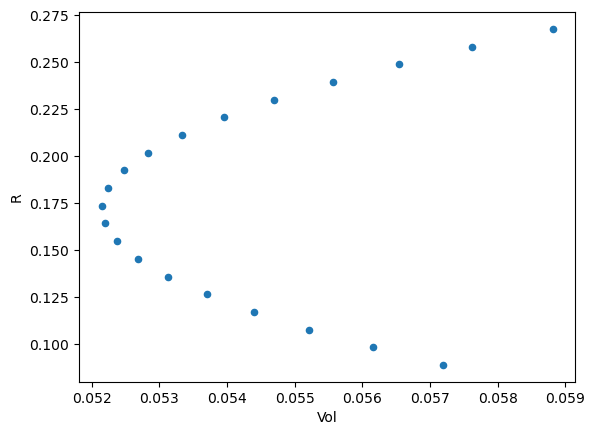

In [77]:
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l, l]) for w in weights]
import pandas as pd
ef = pd.DataFrame ({"R": rets, "Vol": vols})
ef.plot.scatter(x="Vol", y="R")


<Axes: xlabel='Volatility'>

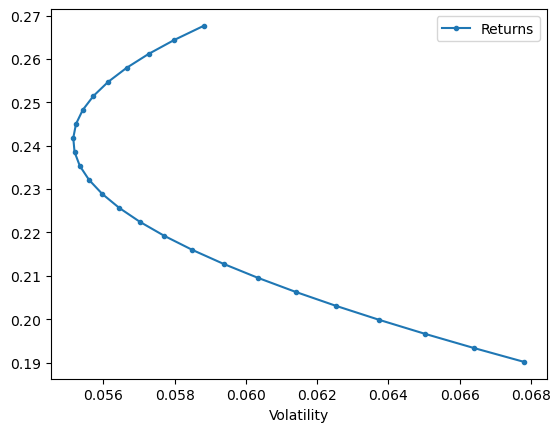

In [80]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l], cov.loc[l,l])

<Axes: xlabel='Volatility'>

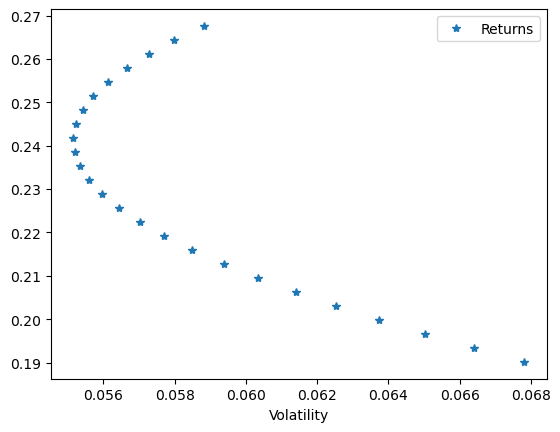

In [85]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l], cov.loc[l,l], style="*")

# N-Asset Efficient Frontier



In [41]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns ()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()


In [42]:
#python

import pandas as pd
def plot_ef(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
    weights = MINIMIZE_VOL(target_return)
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame ({
        "Returns": rets, "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=style)
    
''

''

In [43]:
from scipy.optimize import minimize


<Axes: xlabel='Volatility'>

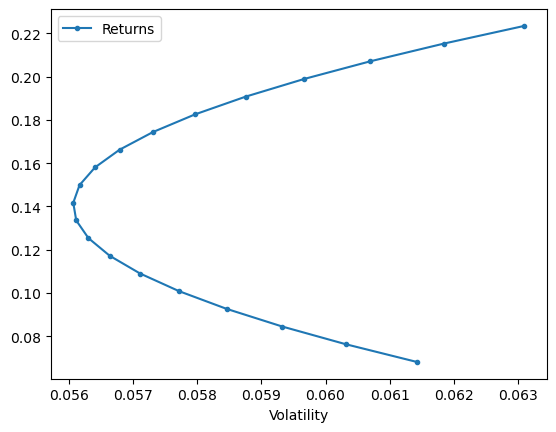

In [44]:
l = ["Games", "Fin"]
erk.plot_ef2(20, er[l], cov.loc[l,l])

In [45]:
import numpy as np

def minimize_vol(target_return, er, cov):
    """
    Find the minimum volatility portfolio subject to a target return.
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    return_is_target = {
        'type': 'eq',
        'args': (er,), 
        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)
    }
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(erk.portfolio_vol, init_guess, 
                       args=(cov,), method='SLSQP', options={'disp': False}, 
                       constraints=(return_is_target, weights_sum_to_1), 
                       bounds=bounds
                      )
    return results.x


In [46]:
l

['Games', 'Fin']

In [50]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l, l])
vol15 = erk.portfolio_vol(w15, cov.loc[l, l])
vol15

0.056163669406706564

In [51]:
w15

array([0.47287631, 0.52712369])

In [55]:
import pandas as pd
import numpy as np
def optimal_weighs (n_points, er, cov):
    """
    -> list of weights  to run the optimizer on to minimize the vol
    """
    target_rs = np.linspace(er.min(), er.max(), n_points)
    weights = [minimize_vol(target_return, er, cov) for target_return in target_rs ]
    return weights
    
def plot_ef(n_points, er, cov, style=".-"):
    """
    Plots the N-asset efficient frontier
    """
    weights = optimal_weighs (n_points, er, cov)
    rets = [erk.portfolio_return(w, er) for w in weights]
    vols = [erk.portfolio_vol(w, cov) for w in weights]
    ef = pd.DataFrame ({
        "Returns": rets, "Volatility": vols
    })
    return ef.plot.line(x="Volatility", y="Returns", style=style)

<Axes: xlabel='Volatility'>

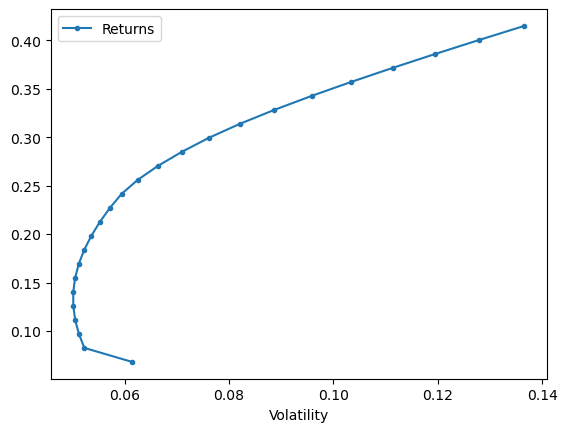

In [57]:
l = ["Smoke", "Fin", "Games", "Coal"]
plot_ef(25, er[l], cov.loc[l,l])

<Axes: xlabel='Volatility'>

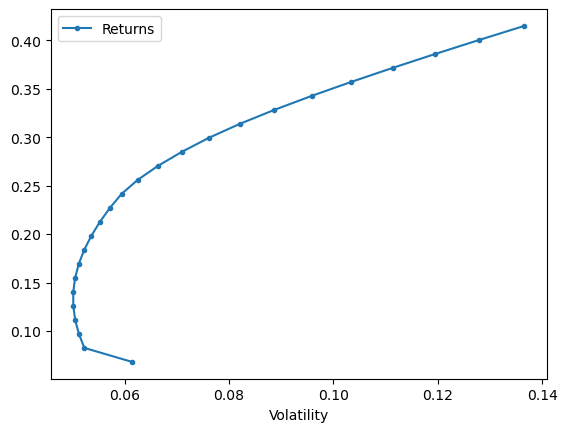

In [58]:
l = ["Smoke", "Fin", "Games", "Coal"]
erk.plot_ef(25, er[l], cov.loc[l,l])

<Axes: xlabel='Volatility'>

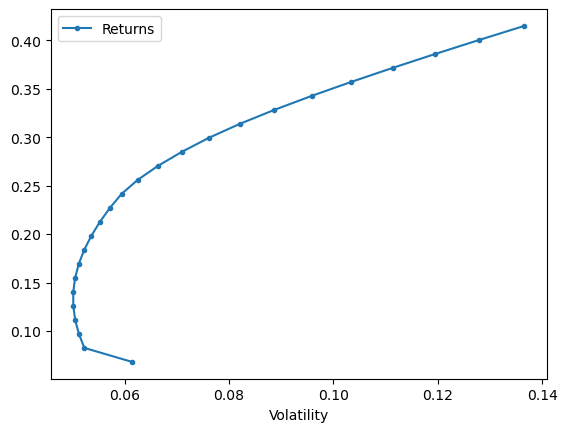

In [59]:
l
erk.plot_ef(25, er[l], cov.loc[l,l])

# Finding the Max Sharpe Ratio Portfolio

In [93]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1995":"2000"], 12)
cov = ind["1995":"2000"].cov()

In [94]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

def msr(riskfree_rate, er, cov):
    """
    Riskfree rate + ER + COV -> W
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    def neg_sharpe_ratio (weights, riskfree_rate, er, cov):
        """
        Returns the negative of the sharpe ratio, given weights
        """
        r = erk.portfolio_return(weights, er)
        vol = erk.portfolio_vol(weights, cov)
        return -(r - riskfree_rate) / vol 
    
    results = minimize(neg_sharpe_ratio, init_guess, 
                       args=(riskfree_rate ,er, cov,), method='SLSQP', options={'disp': False}, 
                       constraints=(weights_sum_to_1), 
                       bounds=bounds
                      )
    return results.x

<Axes: xlabel='Volatility'>

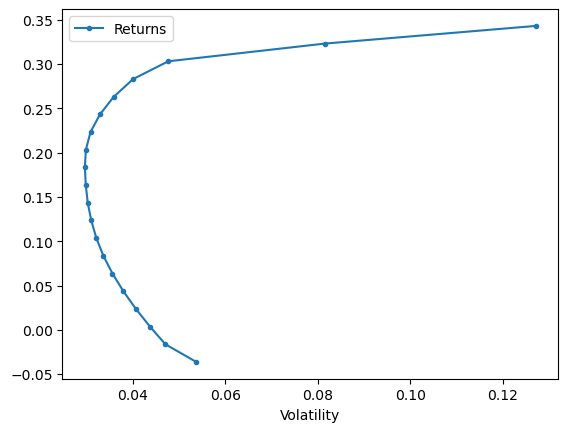

In [74]:
erk.plot_ef(20, er, cov)

(0.0, 0.13196869034205247)

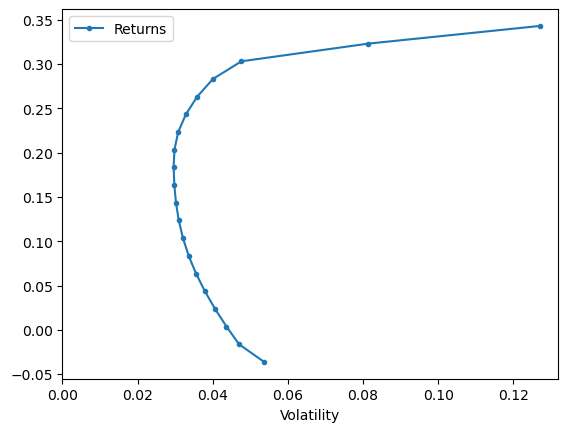

In [75]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)


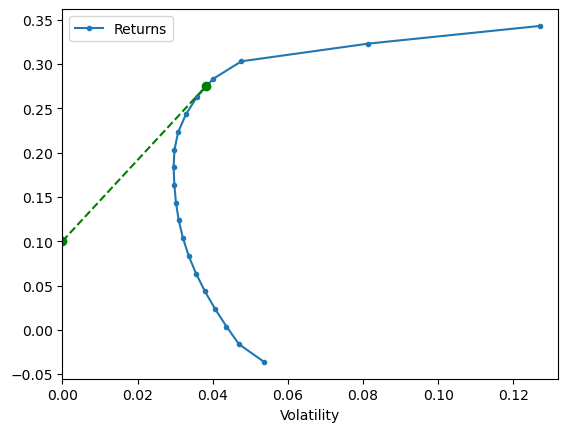

In [76]:
# Assuming you have already imported the necessary libraries and functions

def neg_sharpe_ratio(weights, er, cov):
    """
    Returns the negative of the Sharpe ratio given portfolio weights, expected returns, and covariance matrix.
    """
    r = erk.portfolio_return(weights, er)
    vol = erk.portfolio_vol(weights, cov)
    return -(r - 0.1) / vol

def msr(riskfree_rate, er, cov):
    """
    Find the portfolio of the Maximum Sharpe Ratio (MSR) given a risk-free rate, expected returns, and covariance matrix.
    """
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    weights_sum_to_1 = {
        'type': 'eq',
        'fun': lambda weights: np.sum(weights) - 1
    }
    results = minimize(neg_sharpe_ratio, init_guess, 
                       args=(er, cov), method='SLSQP', options={'disp': False}, 
                       constraints=(weights_sum_to_1,), 
                       bounds=bounds
                      )
    return results.x

# Now you can use the functions correctly
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
rf = 0.1
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")


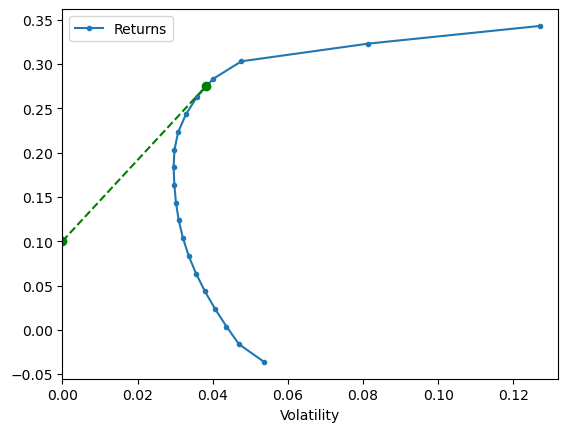

In [77]:
ax = erk.plot_ef(20, er, cov)
ax.set_xlim(left=0)
w_msr = msr(rf, er, cov)
r_msr = erk.portfolio_return(w_msr, er)
vol_msr = erk.portfolio_vol(w_msr, cov)
cml_x = [0, vol_msr]
cml_y = [rf, r_msr]
ax.plot(cml_x, cml_y, color="green", marker="o", linestyle="dashed")

<Axes: xlabel='Volatility'>

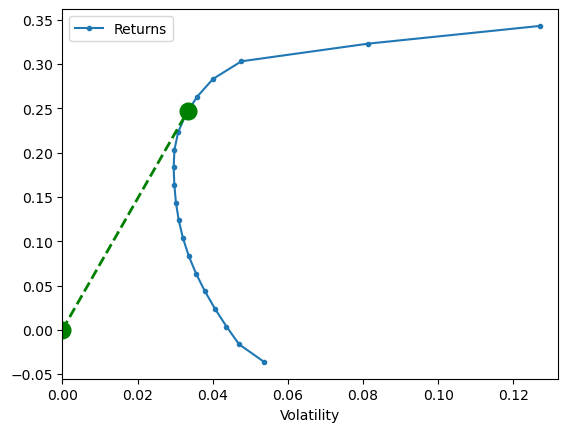

In [78]:
erk.plot_ef(20, er, cov, show_cml=True)

<Axes: xlabel='Volatility'>

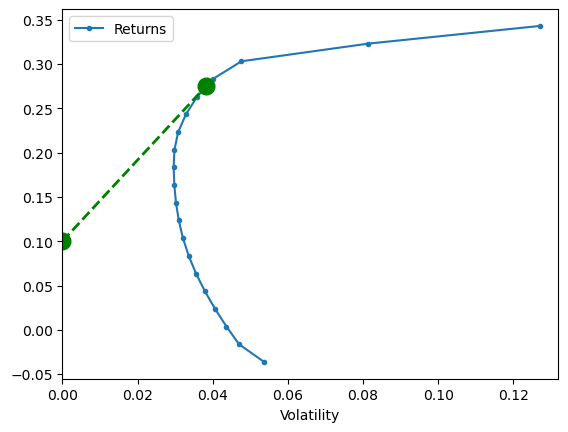

In [79]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

#Lack of Robustness of the Markowitz Procedure, and the GMV

In [101]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns ()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()


In [102]:
l = ["Food", "Steel"]
erk.msr(0.1, er[l], cov.loc[l,l])

array([0.75040363, 0.24959637])

In [103]:
er[l]

Food     0.116799
Steel    0.115809
dtype: float64

In [104]:
erk.msr(0.1, np.array([.11, .12]), cov.loc[l,l])

array([0.57930354, 0.42069646])

In [105]:
erk.msr(0.1, np.array([.10, .13]), cov.loc[l,l])

array([0., 1.])

In [106]:
erk.msr(0.1, np.array([.13, .10]), cov.loc[l,l])

array([1., 0.])

<Axes: xlabel='Volatility'>

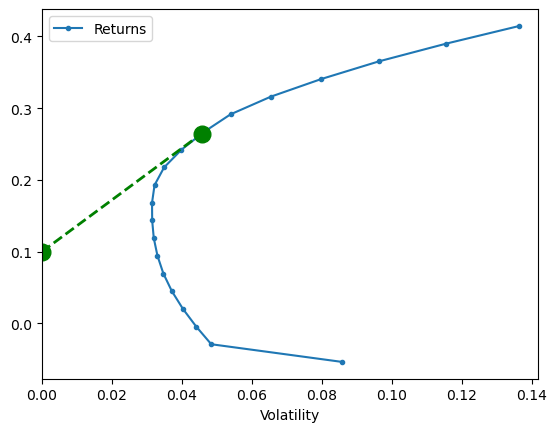

In [107]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1)

<Axes: xlabel='Volatility'>

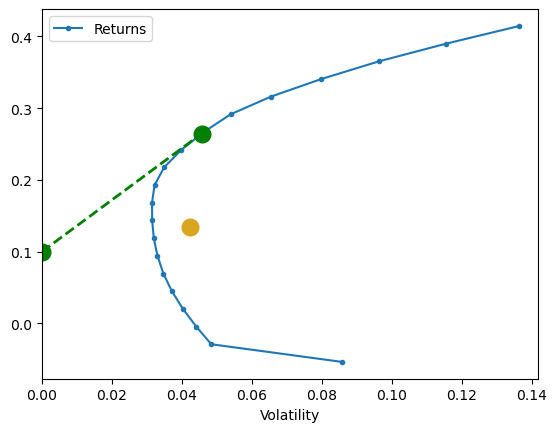

In [109]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True)

<Axes: xlabel='Volatility'>

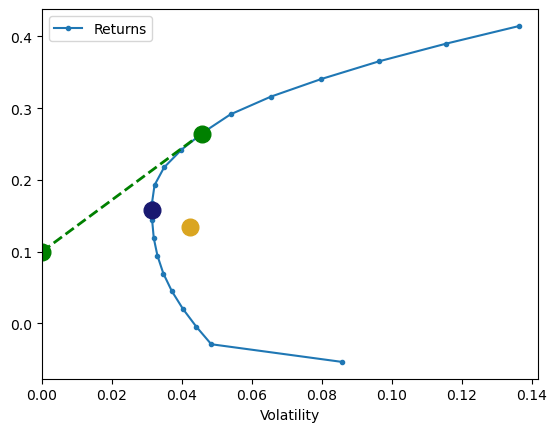

In [112]:
erk.plot_ef(20, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)

#Limits of Diversification 

In [126]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk

ind = erk.get_ind_returns ()
ind_return = erk.get_ind_returns()
ind_size = erk.get_ind_size()
ind_nfirms = erk.get_ind_nfirms()


In [128]:
ind_return.shape

(1110, 30)

In [130]:
ind_size.shape

(1110, 30)

In [131]:
ind_nfirms.shape

(1110, 30)

In [133]:
ind_nfirms.head()

Food  Beer  Smoke  Games  Books  Hshld  Clths  Hlth  Chems  Txtls  \
1926-07    43     3     16      7      2      8     12     7     17     13   
1926-08    43     3     16      7      2      8     12     7     17     13   
1926-09    43     3     16      7      2      8     12     7     17     13   
1926-10    43     3     16      7      2      8     12     7     17     13   
1926-11    43     3     16      7      2      8     12     7     17     13   

         ...  Telcm  Servs  BusEq  Paper  Trans  Whlsl  Rtail  Meals  Fin  \
1926-07  ...      5      3      7      6     74      2     33      6   12   
1926-08  ...      5      3      7      6     74      2     33      6   12   
1926-09  ...      5      3      7      6     74      2     33      6   12   
1926-10  ...      5      3      7      6     74      2     33      6   12   
1926-11  ...      5      3      7      6     74      2     33      6   12   

         Other  
1926-07      4  
1926-08      4  
1926-09      4  
1926-10      4  
1926-11      4  

[5 rows x 30 columns]

In [136]:
ind_mktcap = ind_nfirms * ind_size
ind_mktcap.shape

(1110, 30)

<Axes: >

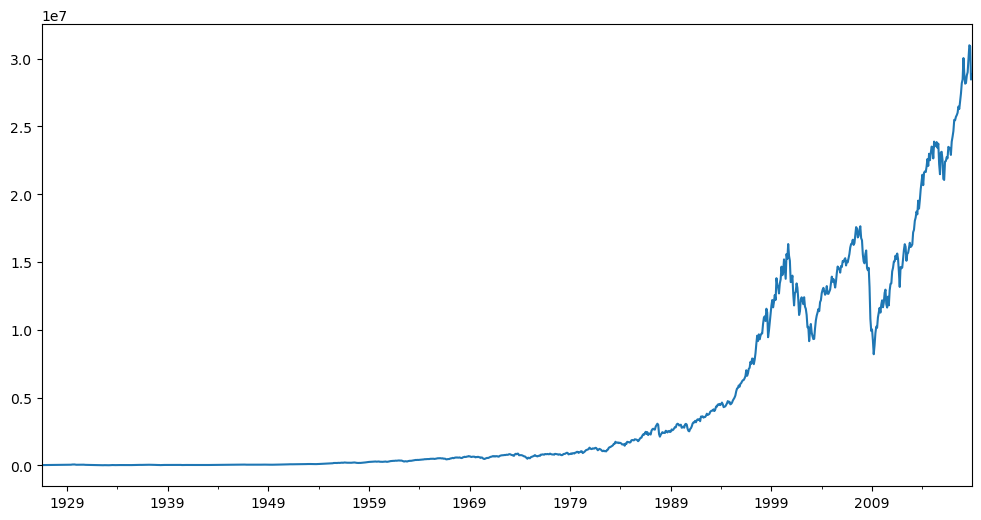

In [138]:
total_mktcap = ind_mktcap.sum(axis="columns")  
total_mktcap.plot(figsize=(12,6))

In [142]:
ind_capweight = ind_mktcap.divide(total_mktcap, axis="rows")
ind_capweight.head()

Food      Beer     Smoke     Games     Books     Hshld     Clths  \
1926-07  0.058037  0.000801  0.035844  0.006935  0.000902  0.006683  0.008265   
1926-08  0.056578  0.000738  0.035264  0.006932  0.000972  0.006453  0.008673   
1926-09  0.056699  0.000917  0.036510  0.006810  0.001046  0.006038  0.008249   
1926-10  0.056920  0.000954  0.036736  0.007175  0.001028  0.006053  0.008139   
1926-11  0.056725  0.000951  0.038285  0.007047  0.001161  0.005924  0.008396   

             Hlth     Chems     Txtls  ...     Telcm     Servs     BusEq  \
1926-07  0.006701  0.036726  0.003014  ...  0.065714  0.001531  0.014889   
1926-08  0.006583  0.038497  0.002938  ...  0.064380  0.001613  0.014732   
1926-09  0.006668  0.039700  0.003109  ...  0.064318  0.001609  0.014870   
1926-10  0.006704  0.041486  0.003160  ...  0.064896  0.001636  0.014850   
1926-11  0.006831  0.040665  0.003269  ...  0.066868  0.001642  0.015118   

            Paper     Trans     Whlsl     Rtail     Meals       Fin     Other  
1926-07  0.007956  0.185736  0.000089  0.057748  0.002435  0.008476  0.003639  
1926-08  0.008280  0.183379  0.000066  0.056014  0.002406  0.008258  0.003719  
1926-09  0.007873  0.187292  0.000068  0.054227  0.002339  0.008412  0.003879  
1926-10  0.007436  0.186812  0.000063  0.054280  0.002310  0.008280  0.003730  
1926-11  0.007236  0.187051  0.000054  0.054635  0.002279  0.008096  0.003521  

[5 rows x 30 columns]

In [149]:
ind_capweight["1926"].sum(axis="columns")

C:\Users\33758\AppData\Local\Temp\ipykernel_16996\1579460218.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  ind_capweight["1926"].sum(axis="columns")


1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<Axes: >

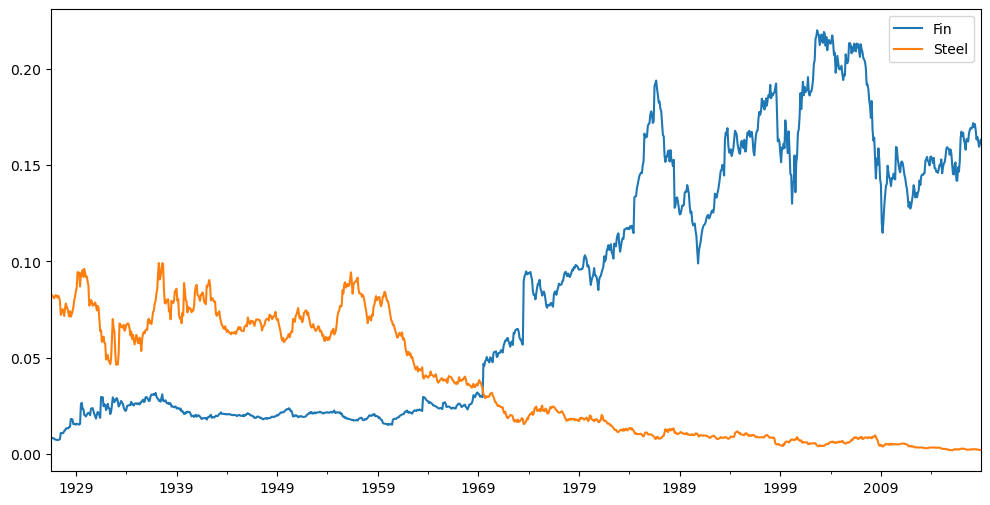

In [152]:
ind_capweight[["Fin", "Steel"]].plot(figsize=(12,6))

<Axes: >

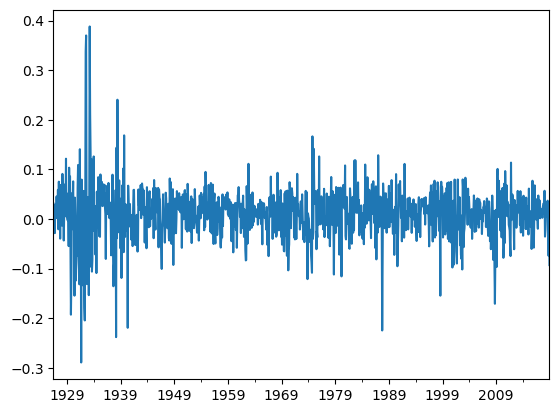

In [157]:
total_market_return = (ind_capweight*ind_return).sum(axis="columns")
total_market_return.plot()

<Axes: title={'center': 'Total Market Capweight Index 1926-2018'}>

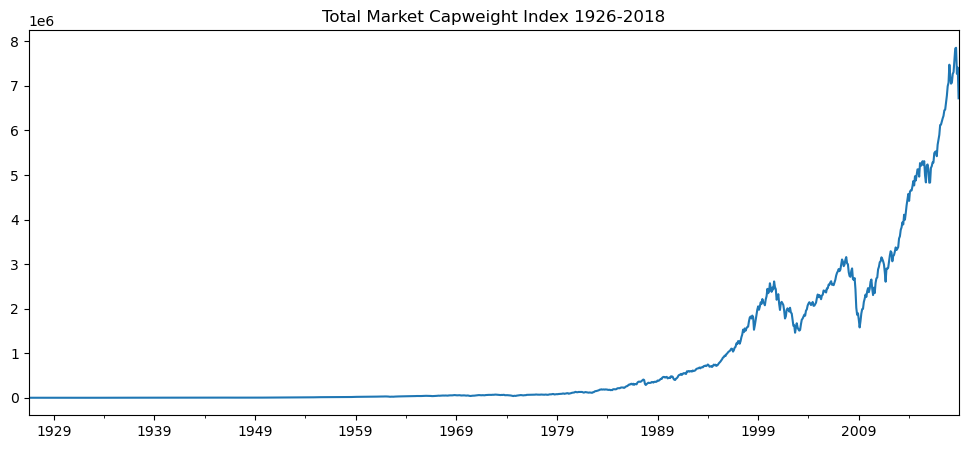

In [159]:
total_market_index = erk.drawdown(total_market_return).Wealth 
total_market_index.plot(figsize=(12,5), title ="Total Market Capweight Index 1926-2018")

<Axes: >

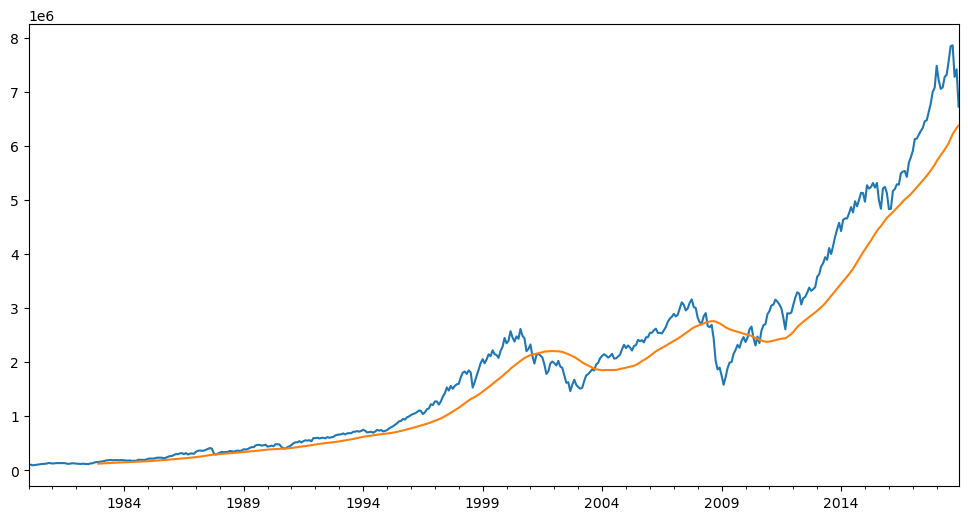

In [161]:
total_market_index["1980":].plot(figsize=[12,6])
total_market_index["1980":].rolling(window=36).mean().plot(figsize=[12,6])

<Axes: >

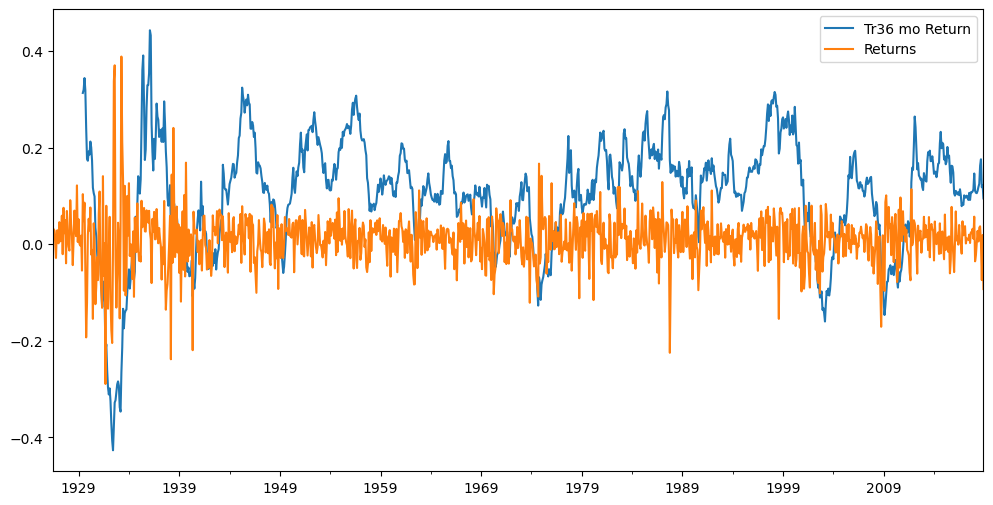

In [165]:
tmi_tr36mrets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36mrets.plot(figsize=(12,6), label="Tr36 mo Return", legend=True)
total_market_return.plot(label="Returns", legend=True)

<Axes: >

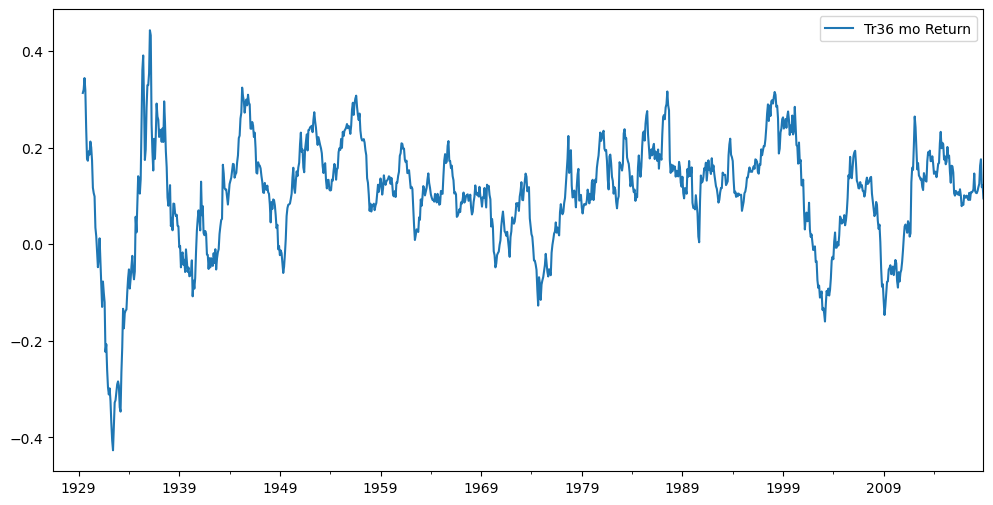

In [166]:
tmi_tr36mrets = total_market_return.rolling(window=36).aggregate(erk.annualize_rets, periods_per_year=12)
tmi_tr36mrets.plot(figsize=(12,6), label="Tr36 mo Return", legend=True)
#total_market_return.plot(label="Returns", legend=True)

### Roling Correlation - along with  Multindexes and .groupby

In [168]:
ts_corr = ind_return.rolling(window=36).corr()
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [169]:
ind_return.head()

Food    Beer   Smoke   Games   Books   Hshld   Clths    Hlth  \
1926-07  0.0056 -0.0519  0.0129  0.0293  0.1097 -0.0048  0.0808  0.0177   
1926-08  0.0259  0.2703  0.0650  0.0055  0.1001 -0.0358 -0.0251  0.0425   
1926-09  0.0116  0.0402  0.0126  0.0658 -0.0099  0.0073 -0.0051  0.0069   
1926-10 -0.0306 -0.0331  0.0106 -0.0476  0.0947 -0.0468  0.0012 -0.0057   
1926-11  0.0635  0.0729  0.0455  0.0166 -0.0580 -0.0054  0.0187  0.0542   

          Chems   Txtls  ...   Telcm   Servs   BusEq   Paper   Trans   Whlsl  \
1926-07  0.0814  0.0039  ...  0.0083  0.0922  0.0206  0.0770  0.0193 -0.2379   
1926-08  0.0550  0.0814  ...  0.0217  0.0202  0.0439 -0.0238  0.0488  0.0539   
1926-09  0.0533  0.0231  ...  0.0241  0.0225  0.0019 -0.0554  0.0005 -0.0787   
1926-10 -0.0476  0.0100  ... -0.0011 -0.0200 -0.0109 -0.0508 -0.0264 -0.1538   
1926-11  0.0520  0.0311  ...  0.0163  0.0377  0.0364  0.0384  0.0160  0.0467   

          Rtail   Meals     Fin   Other  
1926-07  0.0007  0.0187  0.0037  0.0520  
1926-08 -0.0075 -0.0013  0.0446  0.0676  
1926-09  0.0025 -0.0056 -0.0123 -0.0386  
1926-10 -0.0220 -0.0411 -0.0516 -0.0849  
1926-11  0.0652  0.0433  0.0224  0.0400  

[5 rows x 30 columns]

In [172]:
ts_corr.index.names =['Date', 'Industry']
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
Date    Industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [181]:
print(ts_corr.index.levels)
ind_tr36corr = ts_corr.groupby(level=0).apply(lambda cormat: cormat.values.mean())
ts_corr_reset = ts_corr.reset_index()
print(ts_corr_reset.columns)


[[1926-07, 1926-08, 1926-09, 1926-10, 1926-11, 1926-12, 1927-01, 1927-02, 1927-03, 1927-04, 1927-05, 1927-06, 1927-07, 1927-08, 1927-09, 1927-10, 1927-11, 1927-12, 1928-01, 1928-02, 1928-03, 1928-04, 1928-05, 1928-06, 1928-07, 1928-08, 1928-09, 1928-10, 1928-11, 1928-12, 1929-01, 1929-02, 1929-03, 1929-04, 1929-05, 1929-06, 1929-07, 1929-08, 1929-09, 1929-10, 1929-11, 1929-12, 1930-01, 1930-02, 1930-03, 1930-04, 1930-05, 1930-06, 1930-07, 1930-08, 1930-09, 1930-10, 1930-11, 1930-12, 1931-01, 1931-02, 1931-03, 1931-04, 1931-05, 1931-06, 1931-07, 1931-08, 1931-09, 1931-10, 1931-11, 1931-12, 1932-01, 1932-02, 1932-03, 1932-04, 1932-05, 1932-06, 1932-07, 1932-08, 1932-09, 1932-10, 1932-11, 1932-12, 1933-01, 1933-02, 1933-03, 1933-04, 1933-05, 1933-06, 1933-07, 1933-08, 1933-09, 1933-10, 1933-11, 1933-12, 1934-01, 1934-02, 1934-03, 1934-04, 1934-05, 1934-06, 1934-07, 1934-08, 1934-09, 1934-10, ...], ['Autos', 'Beer', 'Books', 'BusEq', 'Carry', 'Chems', 'Clths', 'Cnstr', 'Coal', 'ElcEq', 'Fa

<Axes: xlabel='Date'>

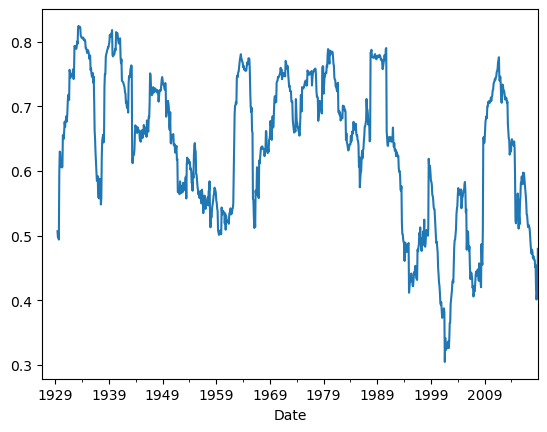

In [183]:
ind_tr36corr.plot()

<Axes: xlabel='Date'>

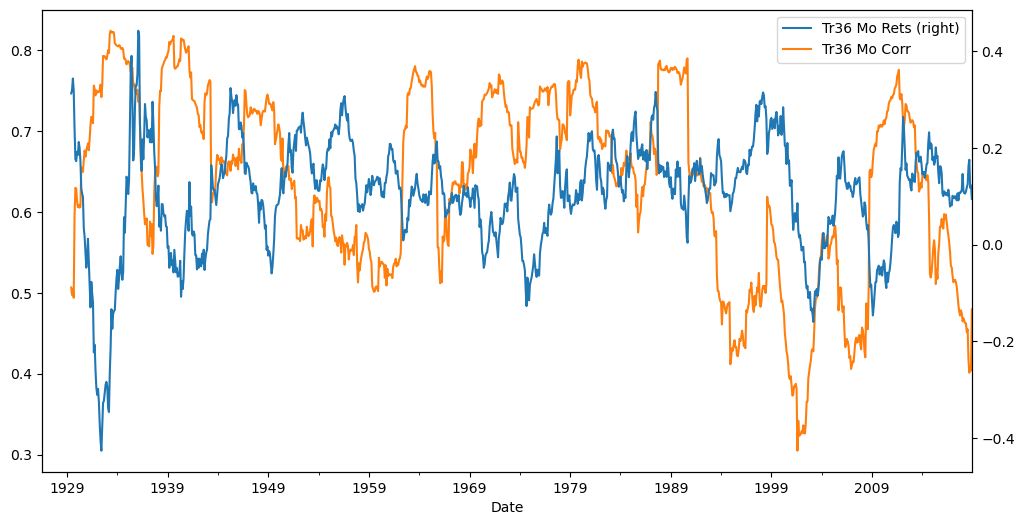

In [191]:
tmi_tr36mrets.plot(label="Tr36 Mo Rets", figsize=(12,6), legend=True, secondary_y=True)
ind_tr36corr.plot(label="Tr36 Mo Corr", figsize=(12,6), legend=True)

<Axes: >

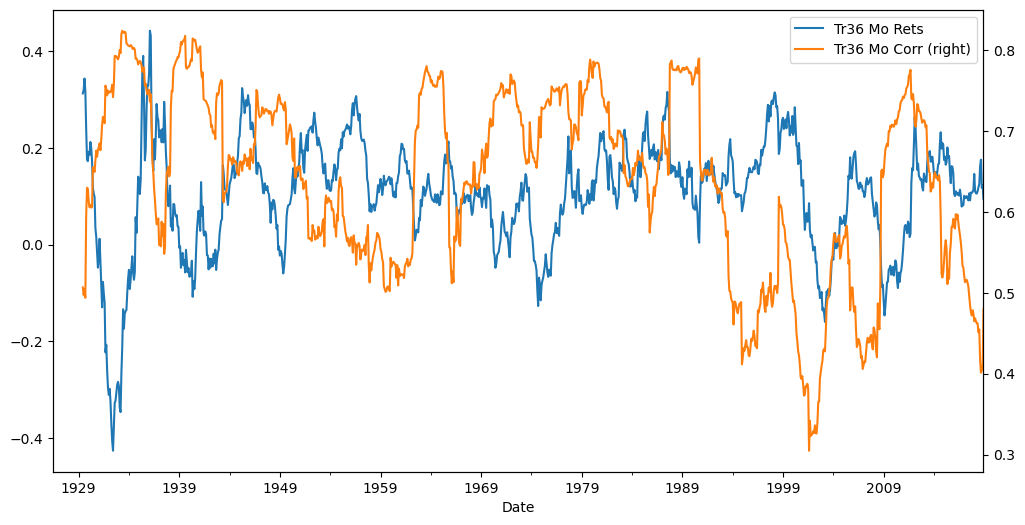

In [192]:
tmi_tr36mrets.plot(label="Tr36 Mo Rets", figsize=(12,6), legend=True, )
ind_tr36corr.plot(label="Tr36 Mo Corr", figsize=(12,6), legend=True, secondary_y=True)

<Axes: >

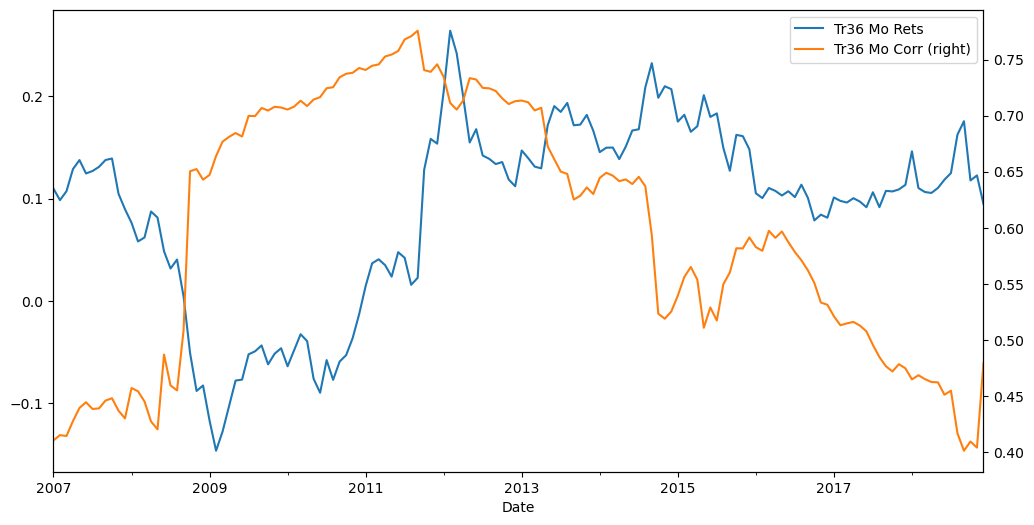

In [193]:
tmi_tr36mrets["2007":].plot(label="Tr36 Mo Rets", figsize=(12,6), legend=True, )
ind_tr36corr["2007":].plot(label="Tr36 Mo Corr", figsize=(12,6), legend=True, secondary_y=True)

In [194]:
tmi_tr36mrets.corr(ind_tr36corr)

-0.28010065062884015

### Implementing Portfolio Insurance (CPPI) and Drawdown Constraints

In [241]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit as erk
import numpy as np
import pandas as pd



In [242]:
import pandas_datareader as pdr

def get_total_market_index_returns(start_date='1990-01-01', end_date=None, symbol='^GSPC'):
    """
    Fetches the total market index returns from Yahoo Finance.

    Parameters:
        start_date (str): Start date for the data (default is '1990-01-01').
        end_date (str): End date for the data (default is None, which fetches up to the current date).
        symbol (str): The symbol of the total market index (default is '^GSPC' for S&P 500).

    Returns:
        pandas.Series: A Series containing the total market index returns.
    """
    data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)['Adj Close'].pct_change().dropna()
    return data


ModuleNotFoundError: No module named 'pandas_datareader'

In [ ]:
# Load the industry returns and the total market index we previously created

ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()

In [ ]:
risky_r = ind_return ["2000":][["Steel", "Fin", "Beer"]]
#Safe Asset


In [ ]:
risky_r.shape

In [ ]:
safe_r = pd.DataFrame().reindex_like(risky_r)

In [ ]:
safe_r.shape

In [ ]:
safe_r[:] = 0.03/12
start = 1000
floor = 0.8

1. Cushion - (Asset Value minus Floor Value)
2. Compute an Allocation to Safe and Risky Assets --> m+risk budget 
3. Recompute the Asset Value based on the returns

In [298]:
import numpy as np

def compound1(r):
    return (1+r).prod()-1
def compound2(r):
    return np.expm1(np.log1p(r).sum()-1)


In [299]:
compound1(risky_r)

Steel   -0.051696
Fin      1.773937
Beer     3.361349
dtype: float64

In [300]:
compound2(risky_r)

Steel   -0.651138
Fin      0.020474
Beer     0.604451
dtype: float64

In [301]:
%timeit compound1(risky_r)

422 µs ± 25.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [302]:
%timeit compound2(risky_r)

638 µs ± 85.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### Back to CPPI

In [303]:
dates = risky_r.index
n_steps = len(dates)
account_value = start
floor_value = start*floor
m = 3
account_history = pd.DataFrame().reindex_like(risky_r)
cushion_history = pd.DataFrame().reindex_like(risky_r)
risky_w_history = pd.DataFrame().reindex_like(risky_r)

for step in range(n_steps):
    cushion  = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w, 1)
    risky_w = np.maximum(risky_w, 0)
    safe_w = 1-risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    ## Update the account value for this step
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    #Save the values so I can look at the gistory and plot it etc
    cushion_history.iloc[step] = cushion
    risky_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value
    

In [304]:
account_history.head()

Steel          Fin        Beer
2000-01   984.380000   974.480000  987.320000
2000-02  1023.292876   931.167544  922.971256
2000-03  1047.555176   998.187296  924.835988
2000-04  1042.079009   973.927479  939.993701
2000-05  1007.137753  1001.460033  991.145489

<Axes: >

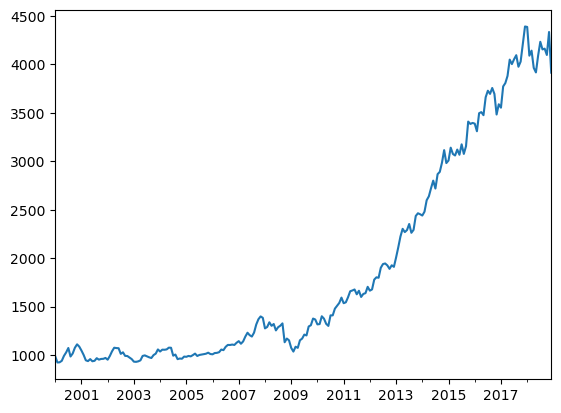

In [305]:
risky_wealth = start*(1+risky_r).cumprod()
account_history["Beer"].plot()

<Axes: >

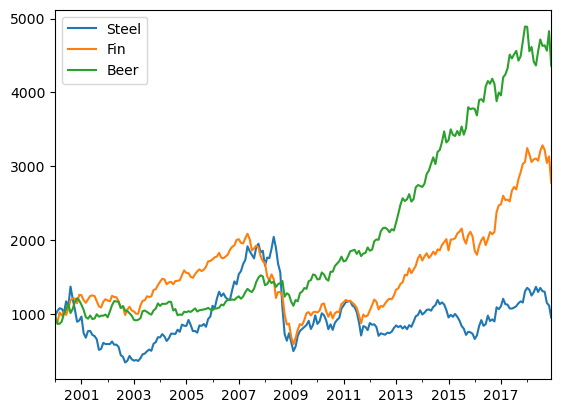

In [306]:
risky_wealth = start*(1+risky_r).cumprod()
risky_wealth.plot()

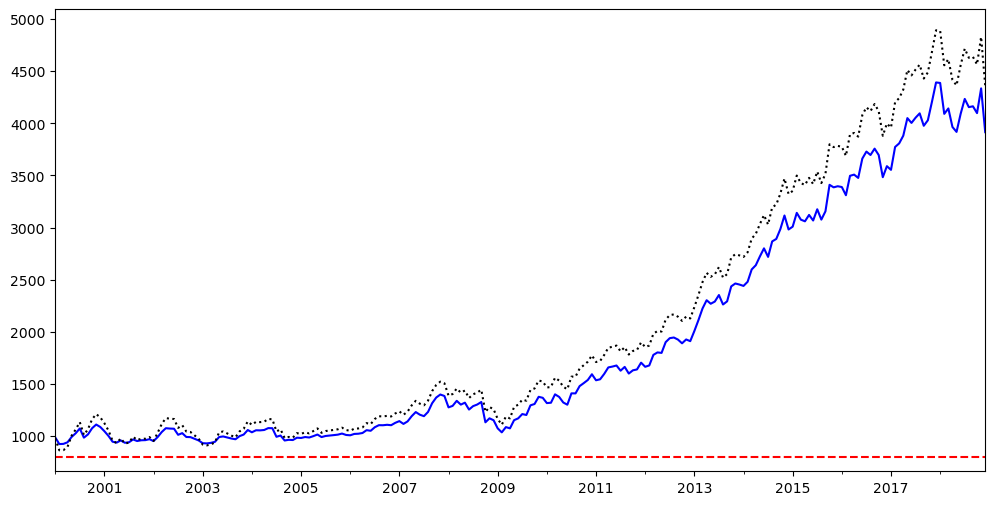

In [307]:
ax = account_history["Beer"].plot(figsize=(12,6), color='Blue')
risky_wealth["Beer"].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle="--")

<Axes: >

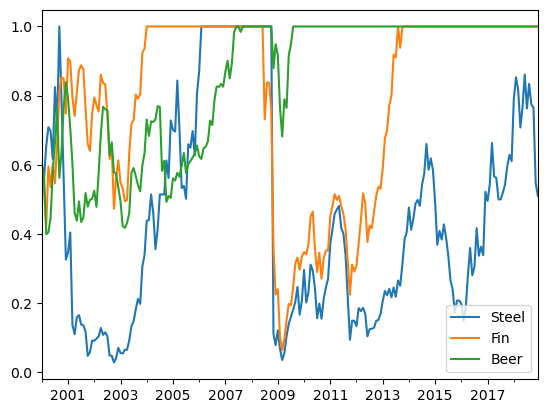

In [308]:
risky_w_history.plot()

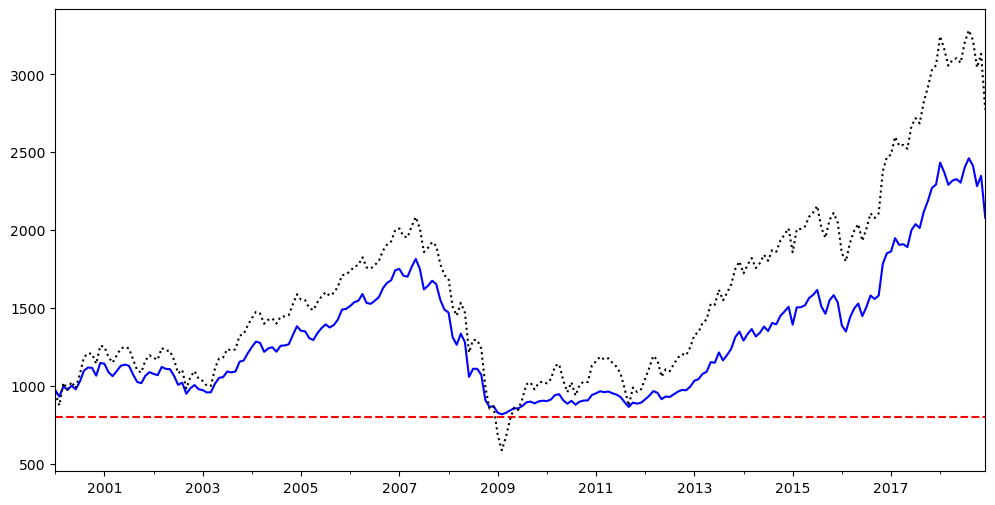

In [309]:
ind = "Fin"
ax = account_history[ind].plot(figsize=(12,6), color='Blue')
risky_wealth[ind].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle="--")

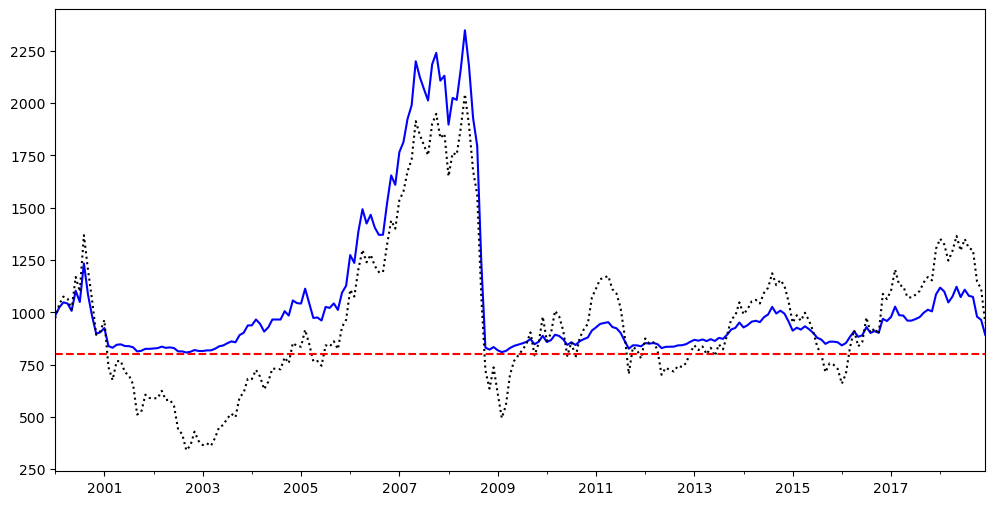

In [310]:
ind = "Steel"
ax = account_history[ind].plot(figsize=(12,6), color='Blue')
risky_wealth[ind].plot(ax=ax, style="k:")
ax.axhline(y=floor_value, color='r', linestyle="--")

In [ ]:
#

In [313]:
erk.summary_stats(risky_r)

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel          -0.002790        0.312368 -0.326334  4.144381   
Fin             0.055166        0.192909 -0.533218  4.995534   
Beer            0.080598        0.138925 -0.493545  4.173881   

       Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
Steel                 0.150139            0.006139     -0.102567     -0.758017  
Fin                   0.091224           -0.000094      0.126718     -0.718465  
Beer                  0.063015           -0.001866      0.354314     -0.271368

In [316]:
btr = erk.run_cppi(risky_r)
erk.summary_stats(btr["Wealth"].pct_change().dropna())

Annualized Return  Annualized Vol  Skewness   Kurtosis  \
Steel          -0.005167        0.174180 -1.995143  17.110190   
Fin             0.040894        0.131678 -0.946504   6.051414   
Beer            0.075544        0.115462 -0.669250   4.760879   

       Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
Steel                 0.091995            0.006710     -0.196750     -0.655198  
Fin                   0.065535            0.000420      0.080352     -0.549673  
Beer                  0.052923           -0.001118      0.383772     -0.259582

<Axes: >

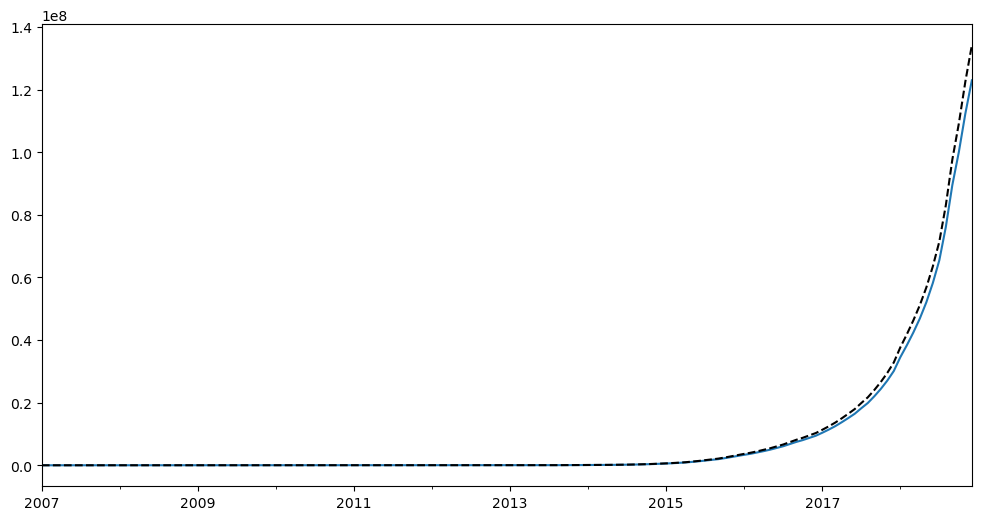

In [318]:
btr = erk.run_cppi(tmi_tr36mrets["2007":])
ax = btr["Wealth"].plot(figsize=(12,6), legend=False)
btr["Risky Wealth"].plot(ax=ax, style="k--", legend=False)

In [319]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
R           1.669914        0.310828  -0.76704  2.733315   

   Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
R                 0.076927            0.028457      5.140285     -0.850738

In [320]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
R           1.659244        0.309235 -0.732481  2.697239   

   Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
R                 0.075762            0.026351      5.133123     -0.837175

# Dradown Constraint

In [322]:
btr = erk.run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]], drawdown=0.25)

<Axes: >

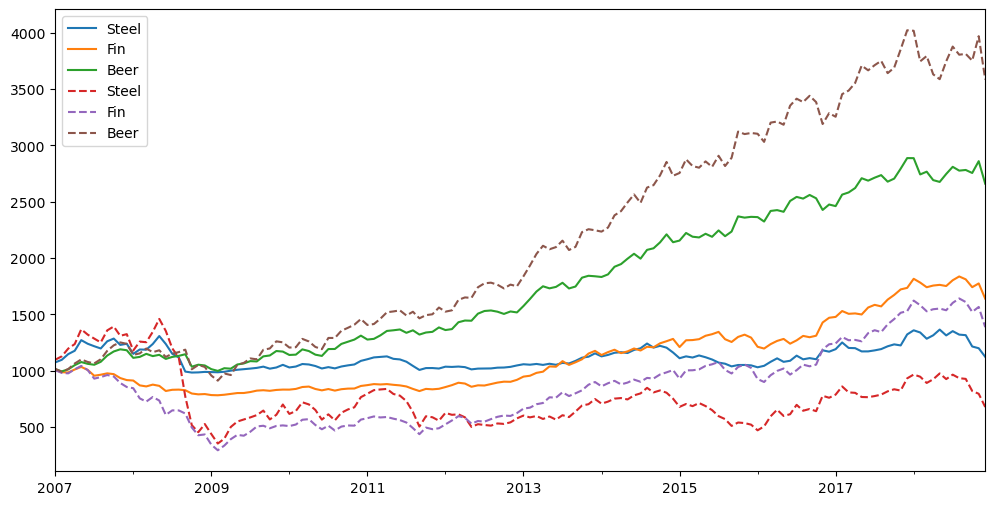

In [324]:
ax = btr ["Wealth"].plot(figsize=(12,6))
btr["Risky Wealth"].plot(ax = ax, style="--")

In [326]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel          -0.039660        0.306407 -0.459951  4.782828   
Fin             0.027364        0.212204 -0.695200  4.621401   
Beer            0.111554        0.127971 -0.670797  4.650878   

       Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
Steel                 0.152288            0.009735     -0.221642     -0.758017  
Fin                   0.105744           -0.000156     -0.012370     -0.718465  
Beer                  0.056497           -0.000083      0.620132     -0.271368

In [327]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
Steel           0.003784        0.097073 -0.441089  5.220481   
Fin             0.041975        0.085028 -0.355163  4.153860   
Beer            0.084375        0.086263 -0.744111  4.571533   

       Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
Steel                 0.047371            0.002480     -0.262958     -0.248059  
Fin                   0.038342           -0.000943      0.136964     -0.243626  
Beer                  0.037937            0.000545      0.613413     -0.161186

#Random Walk Generation



In [331]:
import pandas as pd
import numpy as np

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    #to prices
    prices = s_0*(1+rets).cumprod()
    return prices

In [333]:
p = gbm(10, n_scenarios=3)
p.shape

(120, 3)

In [334]:
p.head()

0           1           2
0  103.478535  106.569779  103.857030
1  109.505300  110.154359  107.352986
2  107.043891  109.387628  101.870817
3  101.472233  108.630798  109.765583
4  107.112336  109.479053  109.229197

<Axes: >

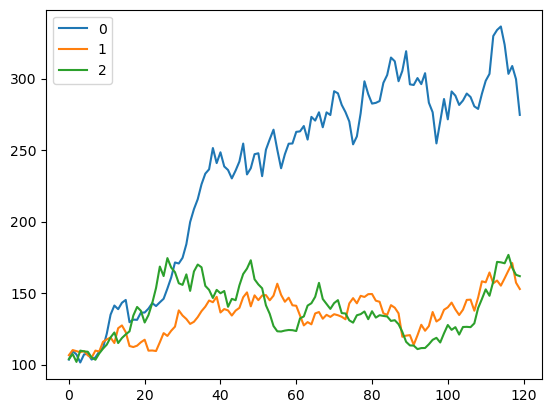

In [335]:
p.plot()

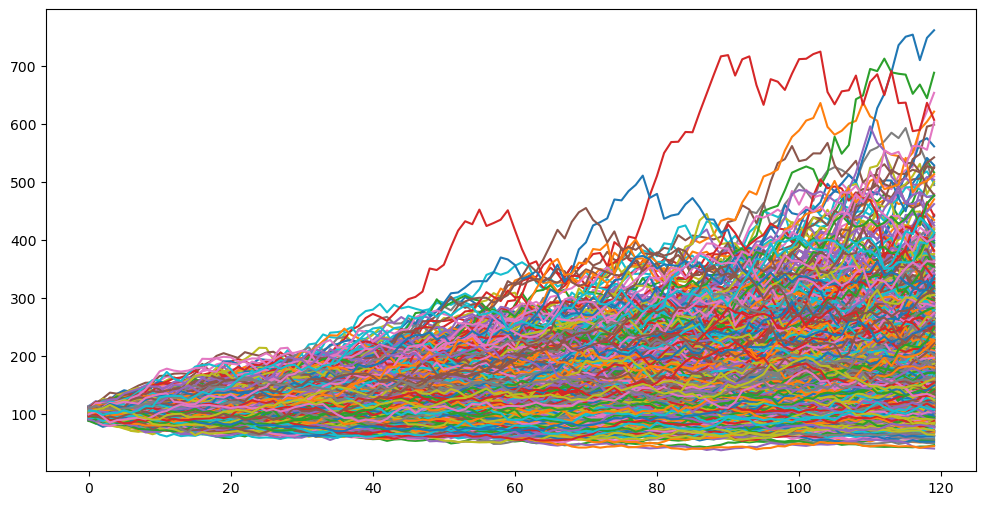

In [339]:
p = gbm(n_years=10, n_scenarios=1000).plot(figsize=(12,6), legend=False)

In [ ]:
p = gbm(n_years=10, n_scenarios=1000)

In [7]:
import pandas as pd
import numpy as np
def gbm0(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0): 
    """"
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    xi = np.random.normal(size=(n_steps, n_scenarios))
    rets = mu*dt + sigma*np.sqrt(dt)*xi
    rets = pd.DataFrame(rets)
    #to prices
    prices = s_0*(1+rets).cumprod()
    return prices

def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps,n_scenarios))
    
    #to prices                                                                                                                                                       #to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [8]:
%timeit gbm0(n_years=5, n_scenarios=1000)

3.07 ms ± 414 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [16]:
%timeit gbm(n_years=5, n_scenarios=1000)

2.09 ms ± 56.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


<Axes: >

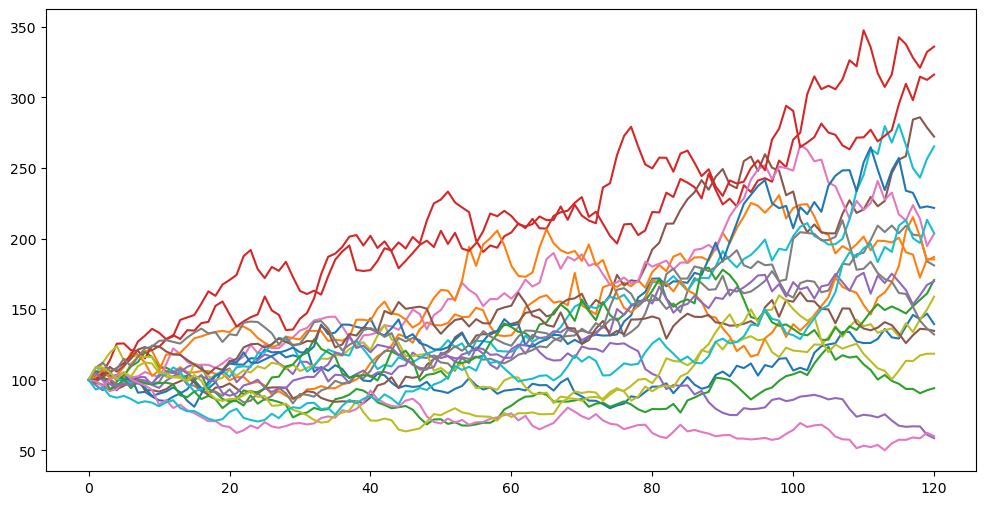

In [17]:
gbm(n_years=10, n_scenarios=20).plot(legend=False, figsize=(12,6))

In [19]:
def gbm(n_years=10, n_scenarios=1000, mu=0.07, sigma=0.15, steps_per_year=12, s_0=100.0):
    """
    Evolution of a stock price using a Geometric Brownian Motion Model
    """
    dt = 1/steps_per_year
    n_steps = int(n_years*steps_per_year)
    rets_plus_1 = np.random.normal(loc=(1+mu*dt), scale=(sigma*np.sqrt(dt)), size=(n_steps,n_scenarios))
    rets_plus_1[0] = 1
    #to prices                                                                                                                                                       #to prices
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod()
    return prices

In [29]:
gbm(n_scenarios=10).head()

0           1           2           3           4           5  \
0  100.000000  100.000000  100.000000  100.000000  100.000000  100.000000   
1   96.144796   95.879097   99.382273  103.429086   87.037662  103.825912   
2   96.055340   94.799056  104.759255  102.747608   82.841091   99.635267   
3   97.257500  101.187424  111.894377  103.411460   87.806435   97.713111   
4   98.782373  103.659390  114.954197  100.550231   86.872903   99.377130   

            6           7           8           9  
0  100.000000  100.000000  100.000000  100.000000  
1   96.432256  111.552117   98.819719   98.878036  
2  100.435670  115.688087  103.320911   96.262258  
3  101.429318  116.757878  105.066752   92.623482  
4   98.590483  115.128145  101.946565   88.795791

### Interactive Plotting and Monte Carlo simulations of CPPI

In [36]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import edhec_risk_kit as erk


In [37]:
import ipywidgets as widgets

In [39]:
def squareit(n):
    return n*n
squareit(5)

25

In [41]:
widgets.interact(squareit, n=(0,100))

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

<function __main__.squareit(n)>

In [37]:
import ipywidgets as widgets

### GBM Interactive Plots

In [92]:
def show_gbm(n_scenarios, mu, sigma):
    """
    Draw the results of a stock price evolution under a Geometric Brownian Motion Model 
    """
    s_0=100
    prices = erk.gbm(n_scenarios=n_scenarios,mu=mu, sigma=sigma, s_0=s_0)
    ax = prices.plot(legend=False, color="indianred", alpha=0.5, linewidth=2, figsize=(12,5))
    ax.axhline (y=s_0, ls=":", color="black")
    ax.set_ylim(top=400)
    #draw a dot at the origin

    ax.plot(0, s_0, marker='o', color='darkred', alpha=0.2)

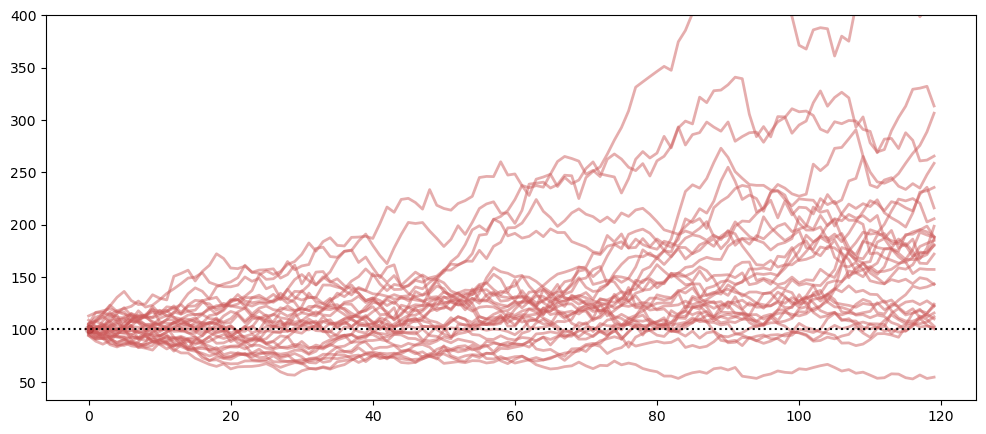

In [62]:
show_gbm(30, 0.07, 0.15)

In [ ]:
gbm_controls = widgets.interactive(show_gbm, n_scenarios = (1, 20, 1), mu= (0, 0.2, 0.1), sigma=(0, .3, .01))

In [64]:
display(gbm_controls)

interactive(children=(IntSlider(value=10, description='n_scenarios', max=20, min=1), FloatSlider(value=0.1, de…

### Interaction CPPI Simulation - Monte Carlo

In [99]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import ipywidgets as widgets

def show_gbm(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100 
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # Run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max = wealth.values.max() * y_max / 100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start * floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
 
cppi_controls = widgets.interactive(show_gbm,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0, 0.2, 0.1), sigma=(0, .3, .05), floor=(0, 2, .1), m=(1, 5, .5), riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis"))
# draw a dot at the origin
display(cppi_controls)


interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [103]:
import matplotlib.pyplot as plt

In [126]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import ipywidgets as widgets

def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100, steps_per_year=12):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100 
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # Run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    #Calculate the terminal wealth stats
    y_max = wealth.values.max() * y_max / 100
    terminal_wealth = wealth.iloc[-1]
    
    tw_mean = terminal_wealth.mean()
    tw_median = terminal_wealth.median()
    failure_mask = np.less(terminal_wealth , start*floor)
    n_failures = failure_mask.sum()
    p_fail = n_failures/n_scenarios
    
    e_shortfall = np.dot(terminal_wealth-start*floor, failure_mask)/n_failures if n_failures > 0 else 0.0
    
    #Plot?
 # Define the number of rows and columns for the subplots
    n_rows = 2
    ncols = 2

    # Plot?
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=n_rows-1, ncols=ncols, sharey=True, gridspec_kw={'width_ratios': [3, 2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)

    wealth.plot(ax = wealth_ax, legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start * floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
 
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    hist_ax.axhline(y=tw_mean, ls=":", color="blue")
    hist_ax.axhline(y=tw_median, ls=":", color="purple")
    hist_ax.annotate(f"Mean: ${int(tw_mean)}", xy=(.7, .9), xycoords='axes fraction', fontsize=24)
    hist_ax.annotate(f"Median: ${int(tw_median)}", xy=(.7, .85), xycoords='axes fraction', fontsize=24)
    if (floor > 0.01):
        hist_ax.axhline(y=start*floor, ls="--", color="red", linewidth=3)
        # Set the position of the annotation at the leftmost point of the line
        hist_ax.annotate(f"Violations: {n_failures} ({p_fail*100:.2f}%)\nE(shortfall)=${e_shortfall:2.2f}", xy=[.7, .7], xycoords='axes fraction', fontsize=24)

cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0, 0.2, 0.1), sigma=(0, .5, .05), floor=(0, 2, .1), 
                                    m=(1, 5, .5), riskfree_rate=(0, .05, .01),
                                    steps_per_year=widgets.IntSlider(min=1, max=12, step=1, value=12, description="Rebals/year"),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis"))
# draw a dot at the origin
display(cppi_controls)


interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [99]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import ipywidgets as widgets

def show_gbm(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100 
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # Run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    y_max = wealth.values.max() * y_max / 100
    ax = wealth.plot(legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    ax.axhline(y=start, ls=":", color="black")
    ax.axhline(y=start * floor, ls="--", color="red")
    ax.set_ylim(top=y_max)
 
cppi_controls = widgets.interactive(show_gbm,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0, 0.2, 0.1), sigma=(0, .3, .05), floor=(0, 2, .1), m=(1, 5, .5), riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis"))
# draw a dot at the origin
display(cppi_controls)


interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

In [105]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import ipywidgets as widgets

def show_cppi(n_scenarios=50, mu=0.07, sigma=0.15, m=3, floor=0., riskfree_rate=0.03, y_max=100):
    """
    Plot the results of a Monte Carlo Simulation of CPPI
    """
    start = 100 
    sim_rets = erk.gbm(n_scenarios=n_scenarios, mu=mu, sigma=sigma, prices=False, steps_per_year=12)
    risky_r = pd.DataFrame(sim_rets)
    # Run the "back"-test
    btr = erk.run_cppi(risky_r=pd.DataFrame(risky_r), riskfree_rate=riskfree_rate, m=m, start=start, floor=floor)
    wealth = btr["Wealth"]
    #Calculate the terminal wealth stats
    y_max = wealth.values.max() * y_max / 100
    terminal_wealth = wealth.iloc[-1]
    #Plot?
 # Define the number of rows and columns for the subplots
    n_rows = 2
    ncols = 2

    # Plot?
    fig, (wealth_ax, hist_ax) = plt.subplots(nrows=n_rows-1, ncols=ncols, sharey=True, gridspec_kw={'width_ratios': [3, 2]}, figsize=(24, 9))
    plt.subplots_adjust(wspace=0.0)

    wealth.plot(ax = wealth_ax, legend=False, alpha=0.3, color="indianred", figsize=(12, 6))
    wealth_ax.axhline(y=start, ls=":", color="black")
    wealth_ax.axhline(y=start * floor, ls="--", color="red")
    wealth_ax.set_ylim(top=y_max)
 
    terminal_wealth.plot.hist(ax=hist_ax, bins=50, ec='w', fc='indianred', orientation='horizontal')
    hist_ax.axhline(y=start, ls=":", color="black")
    
cppi_controls = widgets.interactive(show_cppi,
                                    n_scenarios=widgets.IntSlider(min=1, max=1000, step=5, value=50),
                                    mu=(0, 0.2, 0.1), sigma=(0, .3, .05), floor=(0, 2, .1), 
                                    m=(1, 5, .5), riskfree_rate=(0, .05, .01),
                                    y_max=widgets.IntSlider(min=0, max=100, step=1, value=100, description="Zoom Y Axis"))
# draw a dot at the origin
display(cppi_controls)


interactive(children=(IntSlider(value=50, description='n_scenarios', max=1000, min=1, step=5), FloatSlider(val…

### Present Value of Liabilities and Funding Ratio

# Present Value of Liabilities and Funding Ratio

The present value of a srt of Liabilities $L$ where each liability $L_i$ is due at time $t_i$ is give by:
    
$$ PV(L) = \sum_{i=1}^{k} B(t_i) L_i$$

where $B(t_i)$ is the price of a pure discount bond that pays 1 dollar at time $t_i$

If we assume the yield curve is flat and the annual rate of interest is $r$ then $B(t)$ is given by 

$$B(t) = \frac{1}{(1+r)^t}$$


In [132]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [133]:

def discount (t, r):
    """
   Compute the price of a pure discount bond that pays a dollar at time t, given interest rate r 
    """
    return (1+r)*(-t)

In [134]:
discount(10, .03)

-10.3

In [150]:
def pv(l, r):
    """
    Computes the present value of a sequence of Liabilities l is indexed by the time, and the values are are the amounts of each liabilities returns the present value of the sequence 
    """
    dates = l.index
    discounts = discount(dates, l)
    return (discounts*l)*sum()

In [143]:
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])
liabilities

3.0    1.0
3.5    1.5
4.0    2.0
4.5    2.5
dtype: float64

In [149]:
pv(liabilities, 0.03)

-82.5

In [151]:
liabilities.sum()

7.0

In [161]:
def funding_ratio(assets, liabilities, r):
    """
    Computes the funding ratio of some assets given liabilities and interest rate
    """
    return assets/pv(liabilities, r)


In [160]:
def pv(l, r):
    """
    Computes the present value of a sequence of Liabilities l is indexed by the time, and the values are the amounts of each liability. Returns the present value of the sequence.
    """
    dates = l.index
    discounts = discount(dates, r)
    return (discounts * l).sum()

liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])

def funding_ratio(assets, liabilities, r):
    """
    Computes the funding ratio of some assets given liabilities and interest rate
    """
    return assets / pv(liabilities, r)

funding_ratio(5, liabilities, 0.03)

-0.17652250661959404

In [162]:
funding_ratio(5, liabilities, 0.03)

-0.17652250661959404

In [163]:
funding_ratio(5, liabilities, 0.02)

-0.17825311942959

In [164]:
funding_ratio(5, liabilities, 0.05)

-0.17316017316017315

In [168]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

def show_funding_ratio(assets, r):
    fr = funding_ratio(assets, liabilities, r)
    print (f'{fr*100:.2f}')
    
controls = widgets.interactive(show_funding_ratio, assets = widgets.IntSlider (min=1, max=10, step=1, value=5),
                              r = (0, .20, .01))
display(controls)                 

interactive(children=(IntSlider(value=5, description='assets', max=10, min=1), FloatSlider(value=0.1, descript…

In [169]:
liabilities

3.0    1.0
3.5    1.5
4.0    2.0
4.5    2.5
dtype: float64

### CIR Model to simulate changes in Interest Rates and Liabilities Hedging

In [172]:
import pandas as pd
import numpy as np
import edhec_risk_kit as erk
import ipywidgets as widgets
%load_ext autoreload
%autoreload 2

def inst_to_ann(r):
    """
    Converts short rate to annualised rate
    """
    return np.expm1(r)
def ann_to_inst(r):
    """
    Converts  annualised rate to short rate 
    """
    return np.log1p(r)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [181]:
def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Implements the CIR Model for interest rates
    """
    if r_0 is None: r_0 = b 
    r_0 = ann_to_inst (r_0) 
    dt = 1/steps_per_year 
    
    num_steps = int(n_years*steps_per_year) +1
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    rates[0] = r_0
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t) + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)
    
    return pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps)) 


In [182]:
%matplotlib inline

<Axes: >

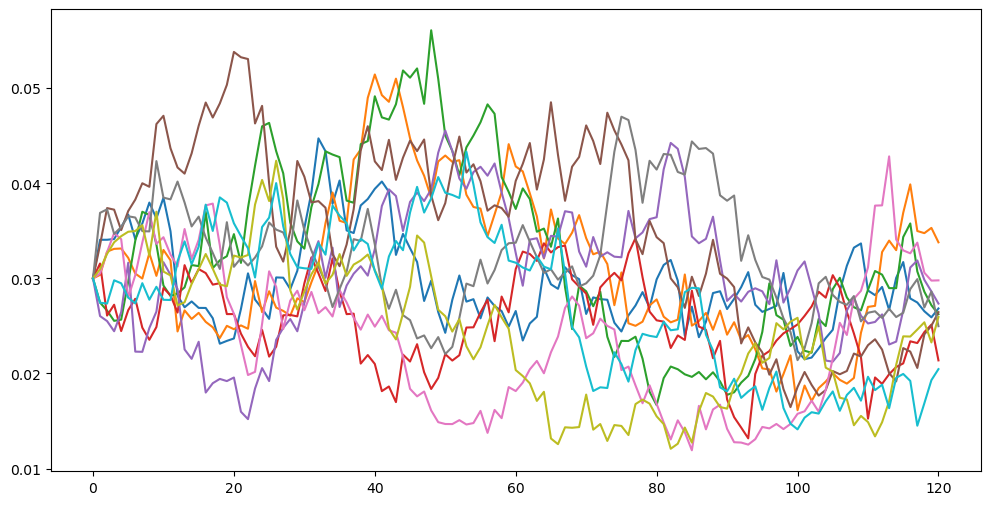

In [184]:
cir(n_scenarios=10).plot(figsize=(12,6), legend=False)

In [190]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

def show_cir(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios).plot(figsize=(12,6), legend=False)
    
controls = widgets.interactive(show_cir, r_0=(0, .15, .01), a = (0, 1, .1), b = (0, .15, .01), sigma = (0, .1, .01), n_scenarios = (1,100),
                               assets = widgets.IntSlider (min=1, max=10, step=1, value=5),
                              r = (0, .20, .01))
display(controls)                 



interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

In [206]:
import math
def cir(n_years=10, n_scenarios=1, a=0.05, b=0.03, sigma=0.05, steps_per_year=12, r_0=None):
    """
    Generate ramdom interest rate evolution over time using the CIR model b and r_0 are assumed to be the annualised rates, not the shprt rate 
    and the returned values are the annualised rates as well
    """
    if r_0 is None: r_0 = b 
    r_0 = ann_to_inst (r_0) 
    dt = 1/steps_per_year 
    num_steps = int(n_years*steps_per_year) +1
    
    shock = np.random.normal(0, scale=np.sqrt(dt), size=(num_steps, n_scenarios))
    rates = np.empty_like(shock)
    
    ## For Price Generation
    h = math.sqrt(a**2 + 2*sigma**2)
    prices = np.empty_like(shock)
    ###
    def price(ttm, r):
        _A = ((2*h*math.exp((h+a)*ttm/2))/(2*h+(h+a)*(math.exp(h*ttm)-1))) **(2*a*b/sigma**2)
        _B = (2*(math.exp(h*ttm)-1))/(2*h + (h+a)*(math.exp(h*ttm)-1))
        _P = np.exp(-_B*r)
        return _P
    prices[0] = price(n_years, r_0)
    ###
              
    rates[0] = r_0
    for step in range(1, num_steps):
        r_t = rates[step-1]
        d_r_t = a*(b-r_t) + sigma*np.sqrt(r_t)*shock[step]
        rates[step] = abs(r_t + d_r_t)
        # generate prices at time t as well
        prices[step] = price(n_years-step*dt, rates[step])
    
    rates = pd.DataFrame(data=inst_to_ann(rates), index=range(num_steps)) 
    ### for prices
    prices = pd.DataFrame(data=prices, index=range(num_steps)) 
    ###
    return rates, prices



In [209]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

def show_cir_prices(r_0=0.03, a=0.5, b=0.03, sigma=0.05, n_scenarios=5):
    cir(r_0=r_0, a=a, b=b, sigma=sigma, n_scenarios=n_scenarios)[1].plot(figsize=(12,6), legend=False)
    
controls = widgets.interactive(show_cir_prices, r_0=(0, .15, .01), a=(0, 1, .1), b=(0, .15, .01), sigma=(0, .1, .01), n_scenarios=(1,100),
                               assets=widgets.IntSlider(min=1, max=10, step=1, value=5),
                               r=(0, .20, .01))
display(controls)                 


interactive(children=(FloatSlider(value=0.03, description='r_0', max=0.15, step=0.01), FloatSlider(value=0.5, …

In [243]:
a_0 = .75
rates, bond_prices = cir(n_years=10, r_0=0.03, b=0.03, n_scenarios=10)
liabilities= bond_prices
zcbond_10 = pd.Series(data=[1], index=[10])
zc_0 = erk.pv(zcbond_10, r=0.03)
n_bonds = a_0/zc_0
av_zc_bonds = n_bonds*bond_prices
av_cash = a_0*((rates/12)+1).cumprod()


<Axes: >

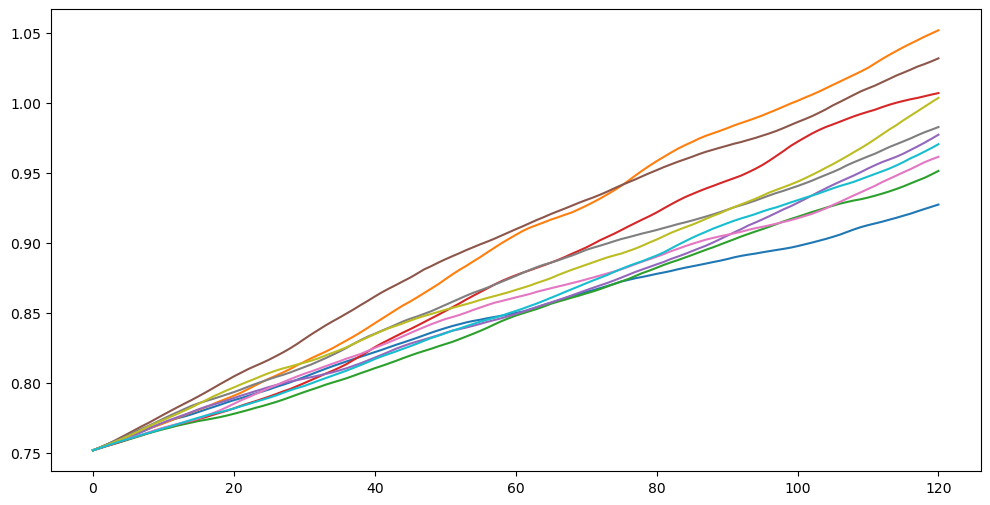

In [244]:
av_cash.plot(legend=False, figsize=(12,6))

<Axes: >

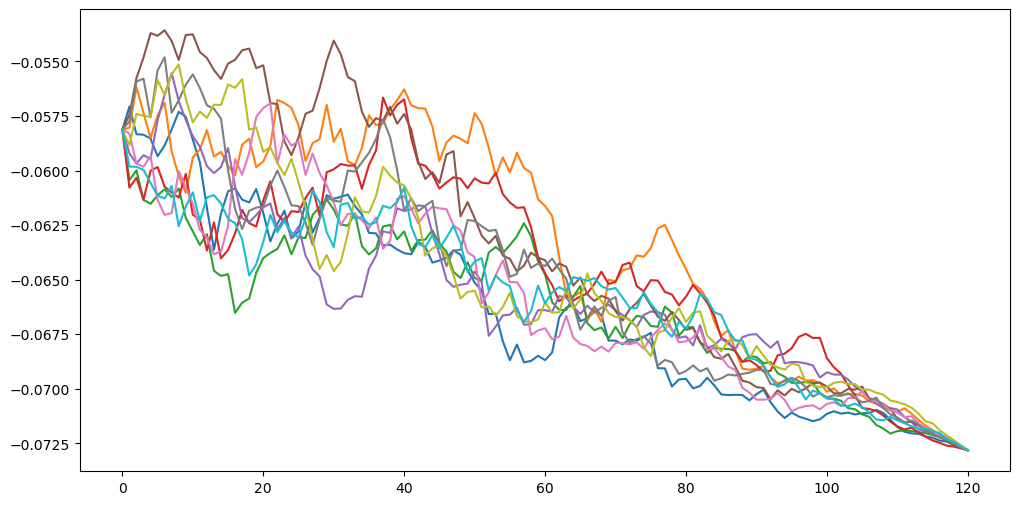

In [245]:
av_zc_bonds.plot(legend=False, figsize=(12,6))

<Axes: title={'center': 'Returns of Funding Ratio with Cash (10 scenarios)'}>

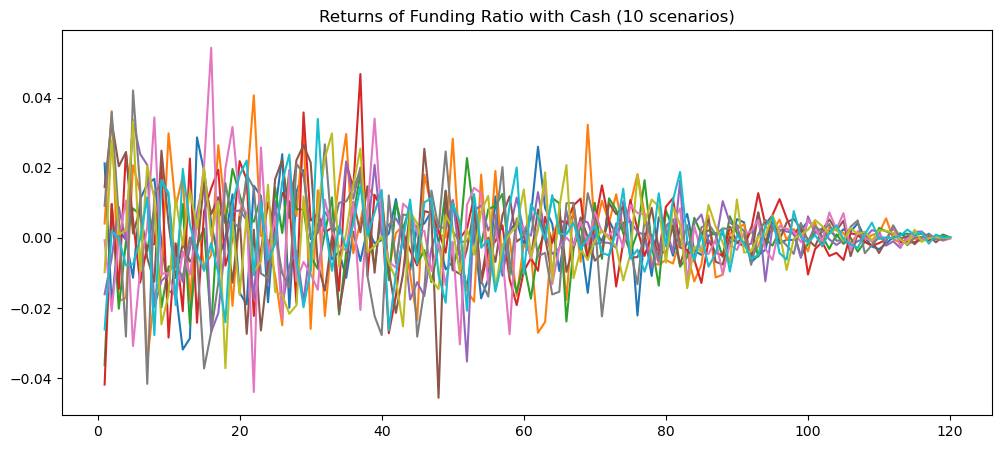

In [246]:
(av_cash/liabilities).pct_change().plot(title = "Returns of Funding Ratio with Cash (10 scenarios)", legend=False, figsize=(12,5))

<Axes: title={'center': 'Returns of Funding Ratio with Cash (10 scenarios)'}>

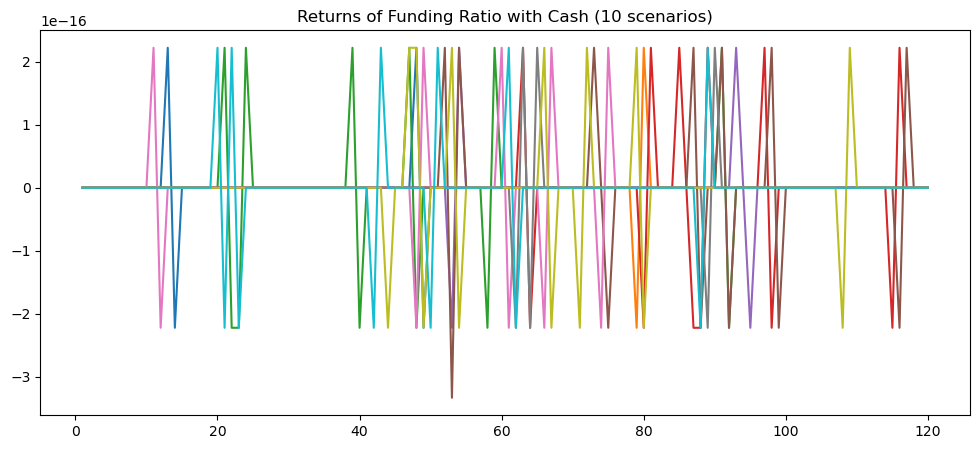

In [247]:
(av_zc_bonds/liabilities).pct_change().plot(title = "Returns of Funding Ratio with Cash (10 scenarios)", legend=False, figsize=(12,5))

In [250]:
a=0.55
rates, bond_prices=cir(n_scenarios=10000, r_0=0.03, b=0.03)
liabilities = bond_prices
zc_0 = erk.pv(zcbond_10, 0.03)
n_bonds = a_0/zc_0
av_zc_bonds = n_bonds*bond_prices
av_cash = a_0*(rates/12+1).cumprod()


<Axes: >

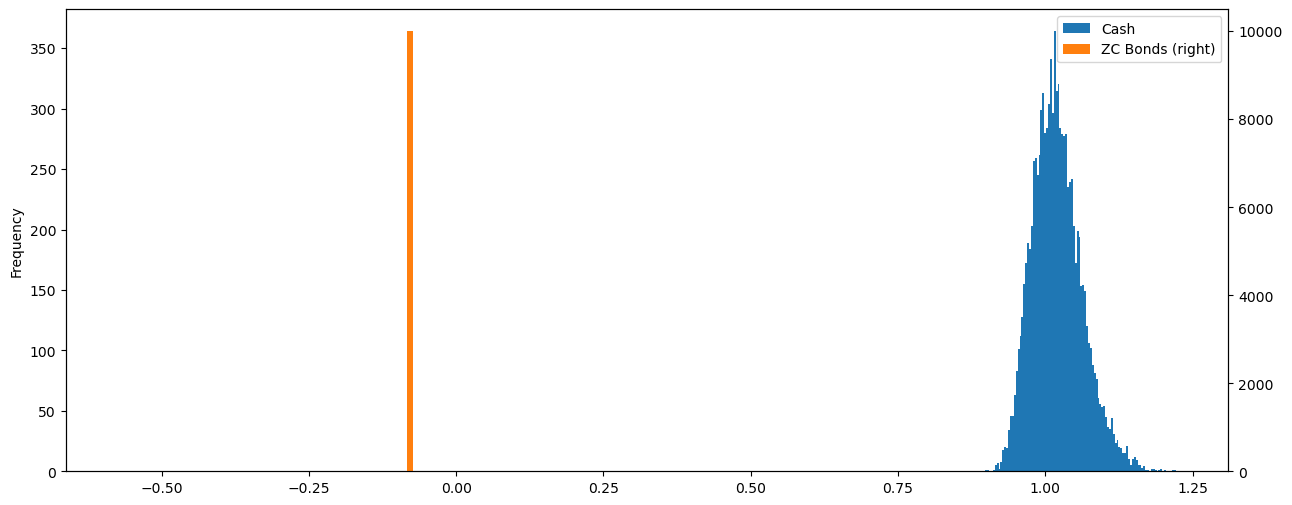

In [251]:
tfr_cash = av_cash.iloc[-1]/liabilities.iloc[-1]
tfr_zc_bonds = av_zc_bonds.iloc[-1]/liabilities.iloc[-1]
ax = tfr_cash.plot.hist(label="Cash", figsize=(15,6), bins=100, legend=True)
tfr_zc_bonds.plot.hist(ax=ax, label="ZC Bonds", bins=100, legend=True, secondary_y=True)

### GHP Construction with Duration Match 

In [296]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import edhec_risk_kit as erk


In [297]:
erk.bond_cash_flows(3, 100, 0.03, 2)

1      1.5
2      1.5
3      1.5
4      1.5
5      1.5
6    101.5
dtype: float64

In [298]:
erk.bond_price(20, 1000, 0.05, 2, .04) 

-62920.0

In [299]:
erk.bond_price(20, 1000, 0.05, 2, .05) 

-63525.0

In [300]:
erk.bond_price(20, 1000, 0.05, 2, .02) 

-61710.0

In [301]:
rates = np.linspace(.01, .1, num=20)
rates

array([0.01      , 0.01473684, 0.01947368, 0.02421053, 0.02894737,
       0.03368421, 0.03842105, 0.04315789, 0.04789474, 0.05263158,
       0.05736842, 0.06210526, 0.06684211, 0.07157895, 0.07631579,
       0.08105263, 0.08578947, 0.09052632, 0.09526316, 0.1       ])

In [302]:
prices = [erk.bond_price(10, 1000, .05, 2, rate) for rate in rates]
prices

[-25502.5,
 -25622.105263157893,
 -25741.71052631579,
 -25861.315789473683,
 -25980.921052631576,
 -26100.526315789473,
 -26220.131578947367,
 -26339.73684210526,
 -26459.342105263157,
 -26578.94736842105,
 -26698.552631578947,
 -26818.15789473684,
 -26937.763157894733,
 -27057.36842105263,
 -27176.973684210523,
 -27296.578947368416,
 -27416.184210526317,
 -27535.78947368421,
 -27655.394736842107,
 -27775.0]

<Axes: title={'center': 'Price of 10 y bond with diff interest rates'}>

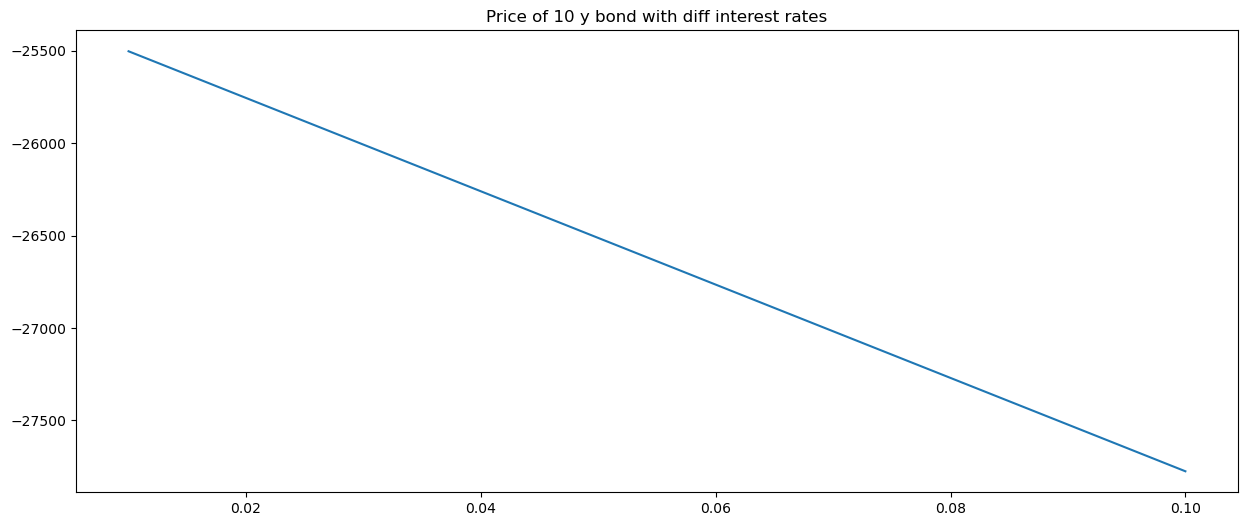

In [303]:
pd.DataFrame(data=prices, index=rates).plot(title="Price of 10 y bond with diff interest rates", legend=False, figsize=(15,6))

In [304]:
cf = erk.bond_cash_flows(3, 1000, .06, 2)
cf

1      30.0
2      30.0
3      30.0
4      30.0
5      30.0
6    1030.0
dtype: float64

In [305]:
discounts = erk.discount(cf.index, .06/2)
discounts

Float64Index([-1.03, -2.06, -3.09, -4.12, -5.15, -6.18], dtype='float64')

In [306]:
dcf = discounts*cf
dcf

1     -30.9
2     -61.8
3     -92.7
4    -123.6
5    -154.5
6   -6365.4
dtype: float64

In [307]:
weights = dcf/dcf.sum()
weights

1    0.004525
2    0.009050
3    0.013575
4    0.018100
5    0.022624
6    0.932127
dtype: float64

In [308]:
(cf.index*weights).sum()

5.841628959276018

In [309]:
erk.macaulay_duration(erk.bond_cash_flows(3,1000, .06, 2), .06/2)

5.841628959276018

## Duration matching

In [310]:
liabilities = pd.Series(data=[100000, 100000], index=[10,12])
erk.macaulay_duration(liabilities, .04)

11.09090909090909

In [311]:
md_10 = erk.macaulay_duration(erk.bond_cash_flows(10, 1000, .05, 1), .04)
md_20 = erk.macaulay_duration(erk.bond_cash_flows(20, 1000, .05, 1), .04)


In [312]:
md_10, md_20

(9.352941176470587, 17.81967213114754)

In [314]:
short_bond = erk.bond_cash_flows(10, 1000, .05, 1)
long_bond = erk.bond_cash_flows(20, 1000, .05, 1)
w_s = erk.match_durations(liabilities, short_bond, long_bond, .04)
w_s

0.7947297577138124

In [318]:
p_short = erk.bond_price(10, 1000, .05, 1, .04)
p_long = erk.bond_price(20, 1000, .05, 1, .04)
a_0 = 130000
p_flows = pd.concat([a_0*w_s*short_bond/p_short, a_0*(1-w_s)*long_bond/p_long])
erk.macaulay_duration(p_flows, .04)

11.090909090909093

In [319]:
erk.macaulay_duration(liabilities, .04)

11.09090909090909

In [321]:
cfr = erk.funding_ratio(p_flows, liabilities, .04)
cfr

-0.056818181818181816

<Axes: title={'center': 'Funding Ratios with changes in Interest Rates'}>

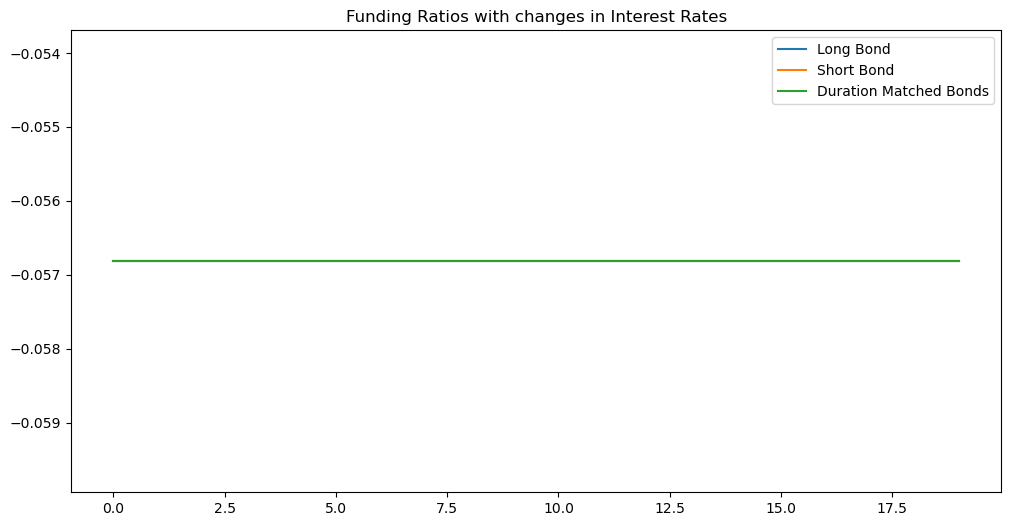

In [322]:
rates = np.linspace(0, .1, 20)
lb_assets = a_0*long_bond/p_long
sb_assets = a_0*short_bond/p_short

fr_change = pd.DataFrame({
    "Long Bond": [erk.funding_ratio(lb_assets, liabilities, r) for r in rates], 
    "Short Bond": [erk.funding_ratio(sb_assets, liabilities, r) for r in rates],
    "Duration Matched Bonds": [erk.funding_ratio(p_flows, liabilities, r) for r in rates]
})

fr_change.plot(title="Funding Ratios with changes in Interest Rates", figsize=(12,6))

<Axes: title={'center': 'Funding Ratios with changes in Interest Rates'}>

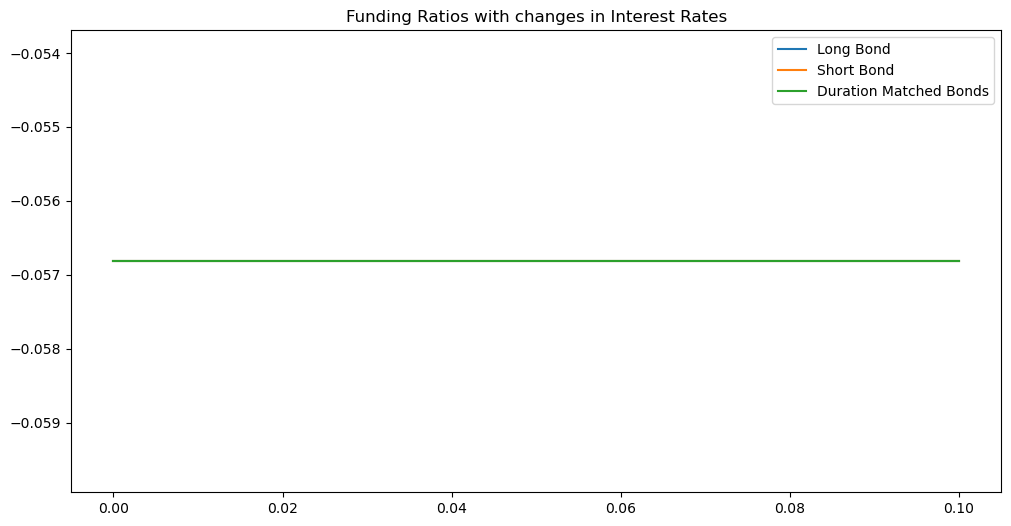

In [323]:
rates = np.linspace(0, .1, 20)
lb_assets = a_0*long_bond/p_long
sb_assets = a_0*short_bond/p_short

fr_change = pd.DataFrame({
    "Long Bond": [erk.funding_ratio(lb_assets, liabilities, r) for r in rates], 
    "Short Bond": [erk.funding_ratio(sb_assets, liabilities, r) for r in rates],
    "Duration Matched Bonds": [erk.funding_ratio(p_flows, liabilities, r) for r in rates]
}, index=rates)

fr_change.plot(title="Funding Ratios with changes in Interest Rates", figsize=(12,6))

### Simualtiion of Prices of coupon-Bearing Bonds using CIR

In [22]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import edhec_risk_kit as erk


In [23]:
erk.bond_price(5, 1000, .05, 12, .03)

0    1092.753929
dtype: float64

In [24]:
rates, zc_price = erk.cir(10, 500, b=0.03, r_0=0.03)

In [25]:
erk.bond_price(5, 100, .05, 12, rates.iloc[0][[1,2,3]])

1    109.275393
2    109.275393
3    109.275393
dtype: float64

In [26]:
erk.bond_price(5, 100, .05, 12, rates.iloc[1][[1,2,3]])

1    109.636699
2    112.584588
3    107.185887
dtype: float64

In [27]:
rates[[1,2,3]].head()

1         2         3
0  0.030000  0.030000  0.030000
1  0.029259  0.023311  0.034339
2  0.028583  0.022198  0.030594
3  0.031679  0.022902  0.028038
4  0.031501  0.021553  0.032035

In [28]:
erk.bond_price(5, 100, .05, 12, rates[[1,2,3,4,5]])

1           2           3           4           5
0    109.275393  109.275393  109.275393  109.275393  109.275393
1    109.487354  112.386627  107.075939  107.557936  107.530905
2    109.657622  112.730728  108.708668  107.831276   108.17104
3     108.06941   112.18509  109.756408  107.584356   109.87246
4    108.018404  112.618691  107.777342  109.146536  111.266643
..          ...         ...         ...         ...         ...
116  100.416667  100.416667  100.416667  100.416667  100.416667
117  100.416667  100.416667  100.416667  100.416667  100.416667
118  100.416667  100.416667  100.416667  100.416667  100.416667
119  100.416667  100.416667  100.416667  100.416667  100.416667
120  100.416667  100.416667  100.416667  100.416667  100.416667

[121 rows x 5 columns]

<Axes: >

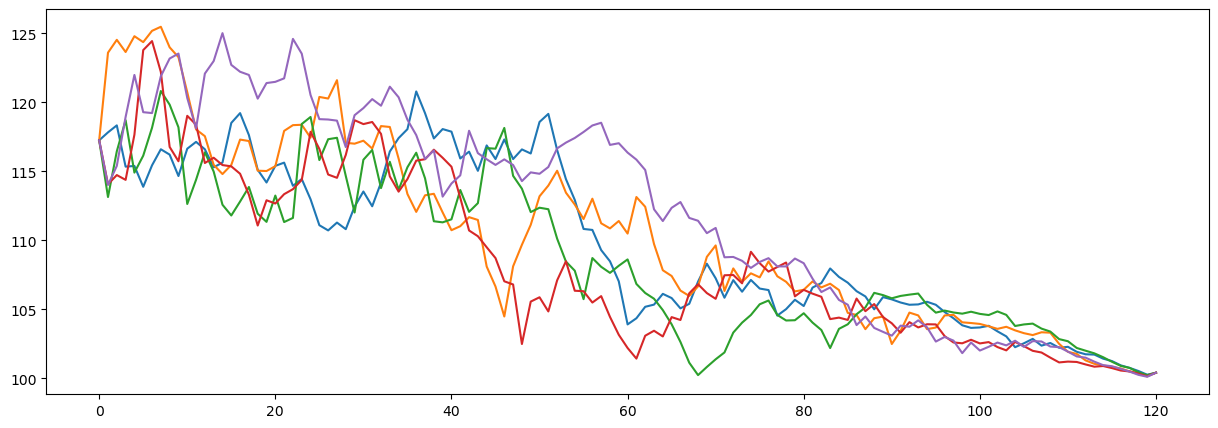

In [29]:
erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]]).plot(legend=False, figsize=(15,5))

In [30]:
prices = erk.bond_price(10, 100, .05, 12, rates[[1,2,3,4,5]])
prices

1           2           3           4           5
0    117.260292  117.260292  117.260292  117.260292  117.260292
1    117.834311  123.609692  113.146968  114.075451   114.02327
2    118.340377  124.540348   116.46147  114.739179  115.404423
3    115.350223   123.65834  118.716414  114.392444  118.949984
4    115.398659  124.803069   114.91735  117.666304  121.995742
..          ...         ...         ...         ...         ...
116   100.94805  100.721036  100.908337  100.572952  100.692768
117  100.764809  100.512384  100.764674  100.505845  100.496206
118  100.541482  100.387276  100.444405  100.344601  100.262401
119  100.269053   100.20227  100.236237    100.1551  100.120734
120  100.416667  100.416667  100.416667  100.416667  100.416667

[121 rows x 5 columns]

In [31]:
prices.pct_change().dropna()
erk.annualize_rets(prices, 12)

1    3378702370387305548480512.0
2    3578143229043909888835584.0
3    3024000577036363786878976.0
4    2911613823696995715383296.0
5    4255356189150629016371200.0
dtype: object

In [32]:
p = erk.bond_price(10, 100, 0.05, 12, rates[[1,2,3,4]])
btr = erk.bond_total_return(p, 100, .05, 12)
erk.annualize_rets(btr, 12)


1    0.030543
2    0.030335
3    0.030981
4    0.031143
dtype: object

In [36]:
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_10[[1,2,3]].tail()

1           2           3
116   100.94805  100.721036  100.908337
117  100.764809  100.512384  100.764674
118  100.541482  100.387276  100.444405
119  100.269053   100.20227  100.236237
120  100.416667  100.416667  100.416667

In [34]:
price_30 = erk.bond_price(30, 100, .05, 12, rates)
price_30[[1,2,3]].tail()

1           2           3
116  147.053569  133.629062  144.590249
117  151.404941  131.399047  151.393305
118  155.324197  136.329147  143.014853
119  154.633567  138.137216  146.241747
120  156.069313  133.756968  144.624706

In [37]:
price_30[[1,2,3]].head()

1           2           3
0  139.531564  139.531564  139.531564
1  141.315575  157.448797  129.257897
2  142.958166  160.617579  137.937732
3   135.26881  158.418559   144.28126
4  135.630603   162.30945  134.371017

In [38]:
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = .6*rets_10 + .4*rets_30

In [40]:
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
0            0.03544        0.004249  0.202666  3.532529   

   Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
0                -0.000983                 NaN      1.246134     -0.000215

In [42]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
price_eq.shape

(121, 500)

In [46]:
rets_eq = price_eq.pct_change().dropna()
rets_eq.shape

(120, 500)

In [47]:
rets_bonds.shape

(120, 500)

In [94]:
rets = .7*rets_eq + .3*rets_bonds
rets_mean = rets.mean(axis='columns')
erk.summary_stats(pd.DataFrame(rets_mean))

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
0           0.057863        0.004319 -0.070952  3.509511   

   Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
0                -0.002645                 NaN      6.279736           0.0

 ### Naive Risk Budgeting Strategies between the PSP and GHP

In [253]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import edhec_risk_kit as erk


In [127]:
def bt_mix(r1, r2, allocator, **kwargs):
    """
    Runs a back test (simulation) of allocating between a two sets of returns r1 and r2 are T x N DataFrames or returns where T is the time step index and N is the number of scenarios. allocator is a function that takes two sets of returns and allocator specific parameters, and produces an allocation to the first portfolio (the rest of the money is invested in the GHP) as a T x 1 DataFrame.
    Returns a T x N DataFrame of the resulting N portfolio scenarios
    """
    if not r1.shape == r2.shape:
        raise ValueError("r1 and r2 need to be the same shape")
    weights = allocator(r1, r2, **kwargs)
    if not weights.shape == r1.shape: 
        raise ValueError("Allocator returned weights that dont match r1")
    r_mix = weights*r1 + (1-weights)*r2
    return r_mix
    

In [128]:
def fixedmix_allocator(r1, r2, w1, **kwargs):
    """
    Produces a time series over T steps of allocations between the PSP and GHP across N scenarios PSP amd GHP are T x N DataFrames that represent the returns of the PSP and GHP such that:
        each column is a scenario 
        each row is the price for a timestep
    Returns an T x N DataFrame of PSP Weights
    """
    return pd.DataFrame(data=w1, index=r1.index, columns=r1.columns)

In [129]:
rates, zc_price = erk.cir(10, 500, b=0.03, r_0=0.03)
price_10 = erk.bond_price(10, 100, .05, 12, rates)
price_30 = erk.bond_price(30, 100, .05, 12, rates)
rets_30 = erk.bond_total_return(price_30, 100, .05, 12)
rets_10 = erk.bond_total_return(price_10, 100, .05, 12)
rets_bonds = erk.bt_mix(rets_10, rets_30, allocator=erk.fixedmix_allocator, w1=.6)
mean_rets_bonds = rets_bonds.mean(axis='columns')
erk.summary_stats(pd.DataFrame(mean_rets_bonds))

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
0           0.035302        0.003413   0.12419  2.946364   

   Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
0                -0.001316                 NaN      1.512116           0.0

In [130]:
price_eq = erk.gbm(n_years=10, n_scenarios=500, mu=0.07, sigma=0.15)
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_price.pct_change().dropna()

In [131]:
rets_7030b = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.fixedmix_allocator, w1=0.7)
rets_7030b_mean = rets_7030b.mean(axis=1)
erk.summary_stats(pd.DataFrame(rets_7030b_mean))

Annualized Return  Annualized Vol  Skewness  Kurtosis  \
0           0.061904        0.004763  0.013426  2.653587   

   Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
0                -0.002762                 NaN      6.518892           0.0

In [132]:
summaries = erk.summary_stats(rets_7030b)
summaries.head()


Annualized Return  Annualized Vol  Skewness  Kurtosis  \
0           0.028599        0.106323 -0.154323  2.793078   
1           0.059214        0.111051 -0.050588  2.570194   
2           0.044459        0.109768  0.280946  3.437847   
3           0.012460        0.101987  0.057845  3.307265   
4           0.023891        0.111731  0.098379  2.359245   

   Cornish-Fisher VaR (5%)  Historic CVaR (5%)  Sharpe Ratio  Max Drawdown  
0                 0.048909            0.001655     -0.012952     -0.256138  
1                 0.047931            0.000446      0.255906     -0.174989  
2                 0.044933            0.001136      0.128073     -0.179254  
3                 0.046097            0.002018     -0.167508     -0.273063  
4                 0.049859            0.002795     -0.053352     -0.182997

In [133]:
summaries.mean()

Annualized Return          0.056470
Annualized Vol             0.106943
Skewness                   0.008662
Kurtosis                   2.951889
Cornish-Fisher VaR (5%)    0.045479
Historic CVaR (5%)         0.001284
Sharpe Ratio               0.244185
Max Drawdown              -0.202384
dtype: float64

In [140]:
def terminal_values(rets):
    """
    Returns the final values at the end of the reutrn period for each scenario
    """
    return (rets+1).prod()

In [142]:
def terminal_stats(rets, floor=0.8, cap=np.inf, name="Stats"):
    """
    Produce Summary Statistics on the terminal values per invested dollar across a range of N scenarios 
    rets is a T x N DataFrame of returns, where T is the time-step (we assume rets is sorted by time)
    Returns a 1 column DataFrame of Summary Stats indexed by the stat name 
    """
    terminal_wealth = (rets + 1).prod()
    breach = terminal_wealth < floor
    reach = terminal_wealth >= cap
    p_breach = breach.mean() if breach.sum() > 0 else np.nan
    p_reach = breach.mean() if reach.sum() > 0 else np.nan
    e_short = (floor - terminal_wealth[breach]).mean() if breach.sum() > 0 else np.nan
    e_surplus = (cap - terminal_wealth[reach]).mean() if reach.sum() > 0 else np.nan
    sum_stats = pd.DataFrame.from_dict({
        "mean": terminal_wealth.mean(),
        "std": terminal_wealth.std(),
        "p_breach": p_breach,
        "p_reach": p_reach,
        "e_short": e_short,
        "e_surplus": e_surplus
    }, orient="index", columns=[name])
    return sum_stats



In [166]:
# Assuming you have already imported the necessary modules and defined the data frames for rets_bonds, rets_eq, and rets_7030

# Calculate terminal statistics for each portfolio
terminal_stats_df = pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="Eq"),
    erk.terminal_stats(rets_7030b, name="70/30")
], axis=1)

print(terminal_stats_df)

                 FI        Eq     70/30
mean       1.370350  2.034583  1.819370
std        0.058033  1.014763  0.617340
p_breach        NaN  0.036000  0.014000
p_reach         NaN       NaN       NaN
e_short         NaN  0.183420  0.115926
e_surplus       NaN       NaN       NaN


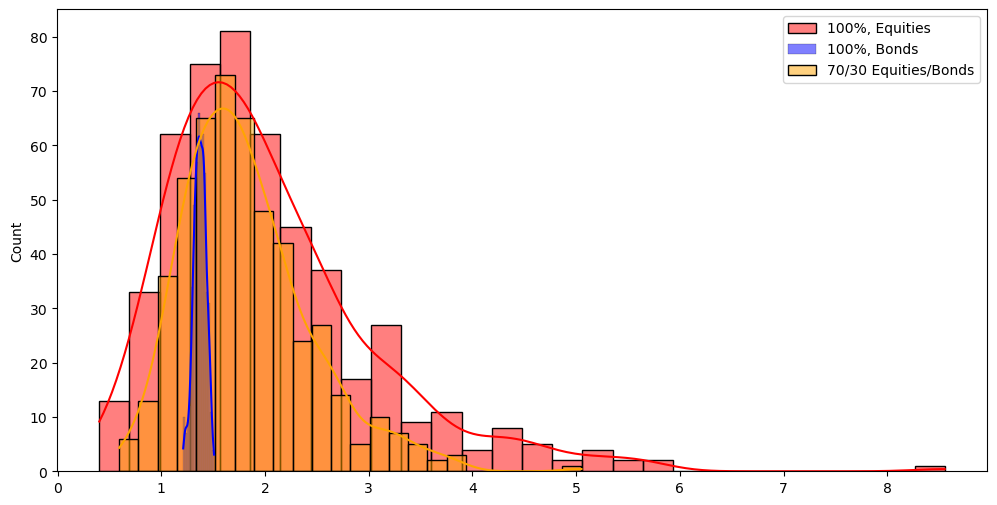

In [165]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,6))
sns.histplot(erk.terminal_values(rets_eq), color="red", label="100%, Equities", kde=True)
sns.histplot(erk.terminal_values(rets_bonds), color="blue", label="100%, Bonds", kde=True)
sns.histplot(erk.terminal_values(rets_7030b), color="orange", label="70/30 Equities/Bonds", kde=True)
plt.legend()
plt.show()


### Glide Paths for Allocation

In [156]:
def glidepath_allocator(r1, r2, start_glide=1, end_glide=0):
    """
    Simulates a Target-Date-Fund style gradual move from r1 to r2 
    """
    n_points = r1.shape[0]
    n_col = r1.shape[1]
    path = pd.Series(data=np.linspace(start_glide, end_glide, num=n_points))
    paths = pd.concat([path]*n_col, axis=1)
    paths.index = r1.index
    paths.columns = r1.columns
    return paths

In [164]:
rets_g8020 = erk.bt_mix(rets_eq, rets_bonds, allocator=erk.glidepath_allocator, start_glide=.8, end_glide=.2)
pd.concat([
    erk.terminal_stats(rets_bonds, name="FI"),
    erk.terminal_stats(rets_eq, name="Eq"),
    erk.terminal_stats(rets_7030b, name="70/30"),
    erk.terminal_stats(rets_g8020, name="Glide from 80 to 20")
], axis=1)


FI        Eq     70/30  Glide from 80 to 20
mean       1.370350  2.034583  1.819370             1.686916
std        0.058033  1.014763  0.617340             0.436783
p_breach        NaN  0.036000  0.014000             0.002000
p_reach         NaN       NaN       NaN                  NaN
e_short         NaN  0.183420  0.115926             0.041224
e_surplus       NaN       NaN       NaN                  NaN

### Dynamic Risk Budgeting 

In [226]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display
import edhec_risk_kit as erk
import matplotlib.pyplot as plt
import seaborn as sns

In [227]:
n_scenarios = 5000
rates, zc_prices = erk.cir(10, n_scenarios=n_scenarios, b=0.03, r_0=0.03, sigma=0.02)
price_eq = erk.gbm(n_years=10, n_scenarios=n_scenarios, mu=0.07, sigma=0.15)

In [228]:
rets_eq = price_eq.pct_change().dropna()
rets_zc = zc_prices.pct_change().dropna()
rets_7030b = erk.bt_mix(rets_eq, rets_zc, allocator=erk.fixedmix_allocator, w1=0.7)
pd.concat([erk.terminal_stats(rets_zc, name="ZC", floor=0.75), erk.terminal_stats(rets_eq, name="Eq", floor=0.75), 
           erk.terminal_stats(rets_7030b, name="70/30", floor=0.75)], axis=1).round(2)

ZC    Eq  70/30
mean       1.26  1.97   1.72
std        0.00  0.98   0.58
p_breach    NaN  0.04   0.01
p_reach     NaN   NaN    NaN
e_short     NaN  0.12   0.10
e_surplus   NaN   NaN    NaN

In [229]:
rets_floor75 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor = .75, zc_prices=zc_prices[1:])
pd.concat([
    erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
    erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
    erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
    erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75)
], axis=1).round(2)


ZC    Eq  70/30  Floor75
mean       1.26  1.97   1.72     1.94
std        0.00  0.98   0.58     0.99
p_breach    NaN  0.04   0.01      NaN
p_reach     NaN   NaN    NaN      NaN
e_short     NaN  0.12   0.10      NaN
e_surplus   NaN   NaN    NaN      NaN

In [230]:
rets_floor75m1 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor = .75, zc_prices=zc_prices[1:], m=1)
rets_floor75m5 = erk.bt_mix(rets_eq, rets_zc, allocator=erk.floor_allocator, floor = .75, zc_prices=zc_prices[1:], m=5)
pd.concat([
    erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
    erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
    erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
    erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
    erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75),
    erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75),
], axis=1).round(2)


ZC    Eq  70/30  Floor75  Floor75m1  Floor75m5
mean       1.26  1.97   1.72     1.94       1.55       1.95
std        0.00  0.98   0.58     0.99       0.40       0.99
p_breach    NaN  0.04   0.01      NaN        NaN       0.00
p_reach     NaN   NaN    NaN      NaN        NaN        NaN
e_short     NaN  0.12   0.10      NaN        NaN       0.00
e_surplus   NaN   NaN    NaN      NaN        NaN        NaN

In [231]:
pd.concat([
    erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
    erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
    erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
    erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
    erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75),
    erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75),
], axis=1).round(4)

ZC      Eq   70/30  Floor75  Floor75m1  Floor75m5
mean       1.2604  1.9695  1.7236   1.9391     1.5496     1.9531
std        0.0000  0.9835  0.5847   0.9880     0.3982     0.9921
p_breach      NaN  0.0370  0.0098      NaN        NaN     0.0002
p_reach       NaN     NaN     NaN      NaN        NaN        NaN
e_short       NaN  0.1234  0.0952      NaN        NaN     0.0000
e_surplus     NaN     NaN     NaN      NaN        NaN        NaN

### Risk Bidgeting with Drawdown Constrains 

In [ ]:
import pandas as pd
import numpy as np
%conda install pandas-datareader
from pandas_datareader.data import DataReader


In [ ]:
cashrate = 0.02
monthly_cashreturn = (1 + cashrate) ** (1 / 12) - 1
rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_eq.index, columns = rets_eq.columns)
rets_maxdd25 = erk.bt_mix(rets_eq, rets_cash, allocator=erk.drawdown_allocator, maxdd=.25)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)

result = pd.concat([
    erk.terminal_stats(rets_zc, name="ZC", floor=0.75),
    erk.terminal_stats(rets_eq, name="Eq", floor=0.75),
    erk.terminal_stats(rets_7030b, name="70/30", floor=0.75),
    erk.terminal_stats(rets_floor75, name="Floor75", floor=0.75),
    erk.terminal_stats(rets_floor75m1, name="Floor75m1", floor=0.75),
    erk.terminal_stats(rets_floor75m5, name="Floor75m5", floor=0.75),
    erk.terminal_stats(rets_maxdd25, name="MaxDD25", floor=0.75),
], 
    axis=1).round(4)

In [237]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].head()

0   -0.138622
1   -0.170879
2   -0.181613
3   -0.161368
4   -0.185905
Name: Max Drawdown, dtype: float64

In [238]:
erk.summary_stats(rets_maxdd25)["Max Drawdown"].min()

-0.23363018410687753

In [264]:
pip install yfinance


     -------------------------------------- 63.0/63.0 kB 561.2 kB/s eta 0:00:00
     ---------------------------------------- 62.6/62.6 kB 3.3 MB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.28.1
    Uninstalling requests-2.28.1:
      Successfully uninstalled requests-2.28.1
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [259]:
import pandas_datareader as pdr

def get_total_market_index_returns(start_date='1990-01-01', end_date=None, symbol='^GSPC'):
    """
    Fetches the total market index returns from Yahoo Finance.

    Parameters:
        start_date (str): Start date for the data (default is '1990-01-01').
        end_date (str): End date for the data (default is None, which fetches up to the current date).
        symbol (str): The symbol of the total market index (default is '^GSPC' for S&P 500).

    Returns:
        pandas.Series: A Series containing the total market index returns.
    """
    data = pdr.get_data_yahoo(symbol, start=start_date, end=end_date)['Adj Close'].pct_change().dropna()
    return data



[*********************100%***********************]  1 of 1 completed


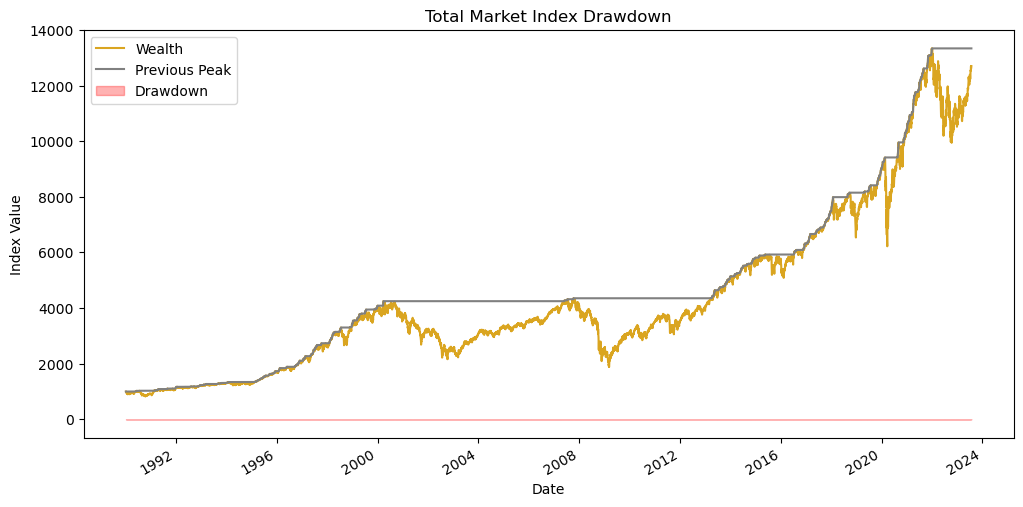

In [265]:
import yfinance as yf

def get_total_market_index_returns(symbol, start_date='1990-01-01', end_date=None):
    data = yf.download(symbol, start=start_date, end=end_date)['Adj Close'].pct_change().dropna()
    return data

rets_tmi = get_total_market_index_returns(symbol='^GSPC', start_date='1990-01-01')
dd_tmi = drawdown(rets_tmi)
ax = dd_tmi[["Wealth", "Previous Peak"]].plot(figsize=(12, 6), ls="-", color=["goldenrod", "gray"])
plt.fill_between(dd_tmi.index, dd_tmi["Drawdown"], color="red", alpha=0.3)
plt.title('Total Market Index Drawdown')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend(["Wealth", "Previous Peak", "Drawdown"])
plt.show()


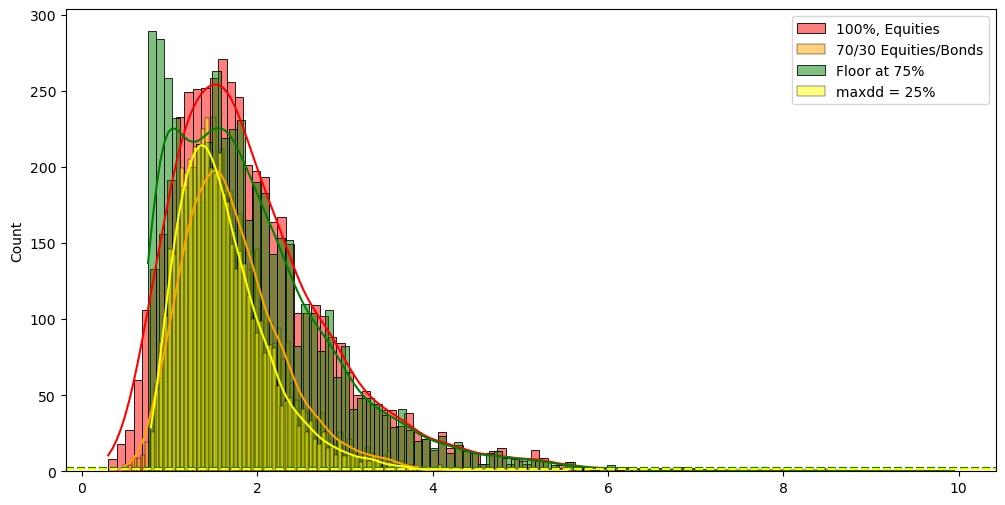

In [266]:
tv_eq = erk.terminal_values(rets_eq)
tv_zc = erk.terminal_values(rets_zc)
tv_7030b = erk.terminal_values(rets_7030b)
tv_floor75 = erk.terminal_values(rets_floor75)
tv_floor75m1 = erk.terminal_values(rets_floor75m1)
tv_maxdd25 = erk.terminal_values(rets_maxdd25)

# Plot
plt.figure(figsize=(12, 6))
sns.histplot(tv_eq, color="red", label="100%, Equities", bins=100, kde=True)
plt.axhline(tv_eq.mean(), ls="--", color="red")

sns.histplot(tv_7030b, color="orange", label="70/30 Equities/Bonds", bins=100, kde=True)
plt.axhline(tv_7030b.mean(), ls="--", color="orange")

sns.histplot(tv_floor75, color="green", label="Floor at 75%", kde=True, bins=100)
plt.axhline(tv_floor75.mean(), ls="--", color="green")

sns.histplot(tv_maxdd25, color="yellow", label="maxdd = 25%", bins=100, kde=True)
plt.axhline(tv_maxdd25.mean(), ls="--", color="yellow")

plt.legend()
plt.show()


### Drawdown constraint with Hisorical Data

In [ ]:
rets_tmi = erk.get_total_market_index_returns()["1990":]
dd_tmi = erk.drawdown(rets_tmi)
ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls="-", color="goldenrod")
dd_tmi["Previous Peak"].plot(ax=ax, ls=":", color="goldenrod")

In [ ]:
cashrate = 0.02
monthly_cashreturn = (1 + cashrate) ** (1 / 12) - 1
rets_cash = pd.DataFrame(data=monthly_cashreturn, index=rets_tmi.index, columns = [0]) # 1 Column dataframe
rets_maxdd25 = erk.bt_mix(pd.DataFrame(rets_tmi), rets_cash, allocator=erk.drawdown_allocator, maxdd=25, m=5)
dd_25 = erk.drawdown(rets_maxdd25[0])

ax = dd_tmi["Wealth"].plot(figsize=(12,6), ls="-", color="goldenrod", label="Market", legend=True)
dd_tmi["Previous Peak"].plot(ax=ax, ls=":", color="goldenrod")
dd_25["Wealth"].plot(ax=ax, ls="maxdd 25%", color="cornflowerblue", legend=True)
dd_25["Previous Peak"].plot(ax=ax, ls=":", color="cornflowerblue", ls=":")

In [ ]:
erk.summary_stats(pd.concat([rets_tmi.rename("Market"), rets_maxdd25[0].rename("Maxdd")], axis=1))